In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'family':"IPAexGothic",
        'weight' : 'bold'}
mpl.rc('font', **font)

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample_submit = pd.read_csv("./data/sample_submit.csv")

In [3]:
train.head()

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


# Data Shape

In [3]:
print("Training data:", train.shape)
print("Test data:", test.shape)

Training data: (31470, 17)
Test data: (31262, 16)


# Concat train and test
# 賃料 and ID are saved as target, total_id respectively

In [4]:
target = train["賃料"]
train = train.drop(columns=["賃料"])
total_data = pd.concat([train, test], ignore_index=True)
total_id = total_data["id"]
total_data = total_data.drop(columns="id")
total_data.shape

(62732, 15)

# Examine Missing Values

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values = missing_values_table(total_data)
missing_values

Your selected dataframe has 15 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
周辺環境,18673,29.8
契約期間,14101,22.5
駐車場,10643,17.0
放送・通信,6894,11.0
方角,5557,8.9
キッチン,1256,2.0
バス・トイレ,649,1.0
室内設備,155,0.2
所在階,1,0.0


# Convert 全角 to 半角

In [7]:
for column in total_data.columns:
    print(column)
    total_data[column] = total_data[column].str.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))

所在地
アクセス
間取り
築年数
方角
面積
所在階
バス・トイレ
キッチン
放送・通信
室内設備
駐車場
周辺環境
建物構造
契約期間


# アクセス　三田駅(兵庫県)--->三田駅

In [8]:
total_data.query("アクセス=='山手線\t田町(東京都)駅\t徒歩13分\t\t三田線\t三田(兵庫県)駅\t徒歩14分\t\tゆりかもめ\t芝浦ふ頭駅\t徒歩7分'").index

Int64Index([13981], dtype='int64')

In [9]:
total_data["アクセス"].iloc[13981]

'山手線\t田町(東京都)駅\t徒歩13分\t\t三田線\t三田(兵庫県)駅\t徒歩14分\t\tゆりかもめ\t芝浦ふ頭駅\t徒歩7分'

In [10]:
total_data["アクセス"] = total_data["アクセス"].replace("山手線\t田町(東京都)駅\t徒歩13分\t\t三田線\t三田(兵庫県)駅\t徒歩14分\t\tゆりかもめ\t芝浦ふ頭駅\t徒歩7分",
                          "山手線\t田町(東京都)駅\t徒歩13分\t\t三田線\t三田(東京都)駅\t徒歩14分\t\tゆりかもめ\t芝浦ふ頭駅\t徒歩7分")

In [11]:
total_data["アクセス"].iloc[13981]

'山手線\t田町(東京都)駅\t徒歩13分\t\t三田線\t三田(東京都)駅\t徒歩14分\t\tゆりかもめ\t芝浦ふ頭駅\t徒歩7分'

# 築年数

## This format is "%Y年%m"
## But there are entries with "新築"

In [12]:
total_data["築年数"] = total_data["築年数"].replace("新築", "0年0ヶ月")
df = total_data["築年数"].str.split("年", expand=True)
df[0] = df[0].astype(int)
df[1] = df[1].str.strip("ヶ月").astype(int)
total_data["築年数_月"] = df[0] * 12 + df[1]
total_data.drop(columns=["築年数"], inplace=True)

# 面積

## Just converts "%dm2" to float

In [13]:
total_data["面積"] = total_data["面積"].str.replace("m2", "").astype(np.float)

# 所在階

In [14]:
total_data[total_data["所在階"].isnull()]

,所在地,アクセス,間取り,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間,築年数_月
40674,東京都江戸川区宇喜田町1469-35,都営新宿線\t船堀駅\t徒歩11分\t\t東西線\t西葛西駅\t徒歩20分\t\t東西線\t...,3LDK,南西,94.91,NaN,バス・トイレ別/\tシャワー/\t追焚機能/\t浴室乾燥機\t/\t温水洗浄便座/\t洗面台...,システムキッチン\t/\tL字キッチン,NaN,バルコニー/\tルーフバルコニー\t/\tフローリング,NaN,NaN,鉄骨造,2年間,4


In [15]:
total_data["所在階"].head()

0     1階/12階建
1     5階/10階建
2    12階/15階建
3      3階/4階建
4      1階/2階建
Name: 所在階, dtype: object

In [16]:
# fill nan with ""-999"
total_data["所在階"] = total_data["所在階"].fillna("2階建")
# add "/" to entries without "/" for splitting
total_data["所在階"][~total_data["所在階"].str.contains("/")] = "/" + total_data["所在階"][~total_data["所在階"].str.contains("/")]
# Split
total_data["階建"] = total_data["所在階"].str.split("/", expand=True)[1]
total_data["所在階"] = total_data["所在階"].str.split("/", expand=True)[0]
# Remove "階" from 所在階
total_data["所在階"] = total_data["所在階"].str.replace("階", "")
# Split again
total_data["所在階_地下"] = total_data["所在階"].str.split("地下", expand=True)[1]
total_data["所在階"] = total_data["所在階"].str.split("地下", expand=True)[0]
total_data["所在階"] = total_data["所在階"].replace("", 0).astype(int)
# total_data["所在階_地下"] = total_data["所在階_地下"].fillna(0).astype(int)
total_data["所在階_地下"] = total_data["所在階_地下"].astype(float)
total_data["階建"] = total_data["階建"].str.replace("階建", "")
total_data["階建"] = total_data["階建"].str.replace("階", "")
total_data["階建_地下"] = total_data["階建"].str.split("(", expand=True)[1]
total_data["階建"] = total_data["階建"].str.split("(", expand=True)[0].astype(int)
# total_data["階建_地下"] = total_data["階建_地下"].str.replace("地下", "").str.replace(")", "").fillna(0).astype(int)
total_data["階建_地下"] = total_data["階建_地下"].str.replace("地下", "").str.replace(")", "").astype(float)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# 間取り

In [17]:
total_data["納戸"] = total_data["間取り"].str.contains("納戸", regex=False)
total_data["間取り"] = total_data["間取り"].str.strip("(納戸)")

unique_keys = sorted(set(''.join(total_data["間取り"].unique())))

for char in ["D", "K", "L", "R", "S"]:
    new_col = "間取り" + "_" + char
#     print(new_col)
    total_data[new_col] = total_data["間取り"].str.contains(char)
    
total_data["間取り_数"] = total_data["間取り"].str.strip("DKLRS+").astype(int)

# 方角

In [18]:
total_data["方角_南"] = total_data["方角"].str.contains("南")
total_data["方角_東"] = total_data["方角"].str.contains("東")
total_data["方角_西"] = total_data["方角"].str.contains("西")
total_data["方角_北"] = total_data["方角"].str.contains("北")
total_data[["方角_南", "方角_東", "方角_西", "方角_北"]] = total_data[["方角_南", "方角_東", "方角_西", "方角_北"]].fillna(False)

# 建物構造

## Fine the way it is

# 契約期間

In [19]:
df = total_data["契約期間"].str.split("\t", expand=True)
# total_data["契約期間_定期借家"] = total_data["契約期間"].str.split("\t", expand=True)[2].replace("定期借家", 1).fillna(0).astype(int)
total_data["契約期間_定期借家"] = total_data["契約期間"].str.split("\t", expand=True)[2].replace("定期借家", 1).astype(float)
total_data["契約期間"] = total_data["契約期間"].str.split("\t", expand=True)[0]
total_data["契約期間"] = total_data["契約期間"].str.replace("ヶ", "")
total_data["契約期間"] = total_data["契約期間"].fillna("0年間")
total_data["契約期間"][total_data["契約期間"].str.contains("年間", regex=False)] = (total_data["契約期間"][total_data["契約期間"].str.contains("年間", regex=False)].str.replace("年間", "").astype(int)+2019).astype(str)+"年8月まで"
total_data["契約期間"][~total_data["契約期間"].str.contains("年")] = "年" + total_data["契約期間"][~total_data["契約期間"].str.contains("年")]
temp_df = total_data["契約期間"][total_data["契約期間"].str.contains("月間", regex=False)].str.replace("月間", "").str.split("年", expand=True)
temp_df[1] = temp_df[1].astype(int) + 8
temp_df[0] = 2019 + temp_df[0].replace("", "0").astype(int)
temp_df[0][temp_df[1] > 12] = temp_df[0][temp_df[1] > 12] + 1
temp_df[1][temp_df[1] > 12] = temp_df[1][temp_df[1] > 12] - 12
total_data["契約期間"][total_data["契約期間"].str.contains("月間", regex=False)] = temp_df[0].astype(str)+ "年" + temp_df[1].astype(str) + "月まで"
total_data["契約期間"] = pd.to_datetime(total_data["契約期間"], format="%Y年%m月まで")
total_data["契約期間_月"] = (total_data["契約期間"].dt.year - 2019)*12 + total_data["契約期間"].dt.month - 8

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 所在地

In [20]:
total_data["所在地"] = total_data["所在地"].str.replace("東京都", "")
total_data["所在地_区"] = total_data["所在地"].str.split("区", expand=True)[0]
total_data["所在地"] = total_data["所在地"].str.split("区", expand=True)[1]

# アクセス

## Clean artifacts

In [21]:
temp_df = total_data["アクセス"].copy()

In [22]:
temp_df = temp_df.str.replace("(東京都)", "", regex=False)
temp_df = temp_df.str.replace("熊野前(舎人ライナー)駅", "熊野前舎人ライナ駅", regex=False)
temp_df = temp_df.str.replace("町屋(東京メトロ)駅", "町屋東京メトロ駅", regex=False)
temp_df = temp_df.str.replace("町屋(東京メトロ)", "町屋東京メトロ駅", regex=False)
temp_df = temp_df.str.replace("豊島園(西武線)駅", "豊島園西武駅", regex=False)
temp_df = temp_df.str.replace("早稲田(東京メトロ)駅", "早稲田東京メトロ駅", regex=False)
temp_df = temp_df.str.replace("浅草(TX)駅", "浅草TX駅", regex=False)
temp_df = temp_df.str.replace("豊島園(都営線)駅", "豊島園都営駅", regex=False)
temp_df = temp_df.str.replace("浦安(千葉県)駅", "浦安千葉県駅", regex=False)
temp_df = temp_df.str.replace("早稲田(都電荒川線)駅", "早稲田都電荒川駅", regex=False)
temp_df = temp_df.str.replace("西日暮里(舎人ライナー)駅", "西日暮里舎人ライナ駅", regex=False)
temp_df = temp_df.str.replace("町屋(京成線)駅", "町屋京成駅", regex=False)
temp_df = temp_df.str.replace("両国(都営線)駅", "両国都営駅", regex=False)
temp_df = temp_df.str.replace("町屋駅前駅", "町屋駅", regex=False)
temp_df = temp_df.str.replace("大塚駅前駅", "大塚駅", regex=False)
temp_df = temp_df.str.replace("王子駅前駅", "王子駅", regex=False)
temp_df = temp_df.str.replace("日暮里(舎人ライナー)駅", "日暮里舎人ライナ駅", regex=False)

temp_df = temp_df.str.replace("総武線・中央線(各停)", "総武中央各停線", regex=False)
temp_df = temp_df.str.replace("総武線・中央線(快速)", "総武中央快速線", regex=False)
temp_df = temp_df.str.replace("中央線(各停)", "中央各停線", regex=False)
temp_df = temp_df.str.replace("中央線(快速)", "中央快速線", regex=False)
temp_df = temp_df.str.replace("東武スカイツリーライン", "東武スカイツリーライン線", regex=False)
temp_df = temp_df.str.replace("日暮里・舎人ライナー", "日暮里舎人ライナー線", regex=False)
temp_df = temp_df.str.replace("ゆりかもめ", "ゆりかもめ線", regex=False)
temp_df = temp_df.str.replace("つくばエクスプレス", "つくばエクスプレス線", regex=False)
temp_df = temp_df.str.replace("丸ノ内線(中野坂上-方南町)", "丸ノ内中野坂上方南町線", regex=False)
temp_df = temp_df.str.replace("丸ノ内線(池袋-荻窪)", "丸ノ内池袋荻窪線", regex=False)
temp_df = temp_df.str.replace("常磐線快速", "常磐快速線", regex=False)
temp_df = temp_df.str.replace("京葉線(東京-蘇我)", "京葉東京蘇我線", regex=False)
temp_df = temp_df.str.replace("東武伊勢崎線(押上-曳舟)", "東武伊勢崎押上曳舟線", regex=False)
temp_df = temp_df.str.replace("東北本線(宇都宮線)", "東北本宇都宮線", regex=False)
temp_df = temp_df.str.replace("湘南新宿ライン(東北本線-横須賀線)", "湘南新宿ライン東北本横須賀線", regex=False)
temp_df = temp_df.str.replace("湘南新宿ライン(高崎線-東海道本線)", "湘南新宿ライン高崎東海道本線", regex=False)
temp_df = temp_df.str.replace("中央本線(東京-松本)", "中央本東京松本線", regex=False)
temp_df = temp_df.str.replace("南武線(川崎-立川)", "南武川崎立川線", regex=False)
temp_df = temp_df.str.replace("ディズニーリゾートライン", "ディズニーリゾートライン線", regex=False)

In [23]:
temp_df.head()

0    都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...
1    都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...
2    京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...
3    総武中央各停線\t高円寺駅\t徒歩9分\t\t丸ノ内池袋荻窪線\t新高円寺駅\t徒歩3分\t...
4    京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町駅\t徒歩7分\t\t京成金町線\...
Name: アクセス, dtype: object

In [24]:
total_data["アクセス"] = temp_df.copy()

In [25]:
total_data["アクセス"].head()

0    都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...
1    都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...
2    京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...
3    総武中央各停線\t高円寺駅\t徒歩9分\t\t丸ノ内池袋荻窪線\t新高円寺駅\t徒歩3分\t...
4    京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町駅\t徒歩7分\t\t京成金町線\...
Name: アクセス, dtype: object

In [26]:
df = total_data["アクセス"].str.split("\t", expand=True)

In [27]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,都営三田線,西巣鴨駅,徒歩4分,,埼京線,板橋駅,徒歩14分,,都電荒川線,西ケ原四丁目駅,徒歩7分,None,None
1,都営大江戸線,勝どき駅,徒歩5分,,有楽町線,月島駅,徒歩9分,,日比谷線,築地駅,徒歩20分,None,None
2,京王線,笹塚駅,徒歩6分,,京王線,代田橋駅,徒歩7分,,京王線,明大前駅,徒歩17分,None,None


## df[0]

In [28]:
# Check entries without "線"
df[0][df[0].str.contains("線") == False].unique()

array([], dtype=object)

In [29]:
total_data["アクセス_線_1"] = df[0]

## df[1]

In [30]:
# Check entries without "駅"
df[1][df[1].str.contains("駅") == False].unique()

array([], dtype=object)

In [31]:
total_data["アクセス_駅_1"] = df[1]

## df[2]

In [32]:
df[2].unique()

array(['徒歩4分', '徒歩5分', '徒歩6分', '徒歩9分', '徒歩2分', '徒歩7分', '徒歩3分', '徒歩8分',
       '徒歩15分', '徒歩11分', '徒歩10分', '徒歩13分', '徒歩12分', '徒歩22分', '徒歩1分',
       '徒歩19分', '徒歩18分', '徒歩23分', '徒歩17分', '徒歩20分', '/バス(6分)都民農園下車徒歩1分',
       '徒歩14分', '/バス(19分)長久保下車徒歩2分', '徒歩24分', '徒歩16分',
       '/バス(7分)大泉風致地区下車徒歩5分', '徒歩29分', '徒歩37分', '徒歩21分',
       '/バス(10分)関町郵便局前下車徒歩1分', '/バス(16分)新小71\u3000農業試験場下車徒歩3分',
       '/バス(18分)土支田二丁目下車徒歩5分', '/バス(12分)比丘尼橋下車徒歩3分', '/バス(10分)団地入口下車徒歩3分',
       '/バス(5分)善福寺下車徒歩1分', '徒歩25分', '/バス(15分)ふれあいの家下車',
       '/バス(13分)水元そよかぜ園下車徒歩1分', '/バス(15分)水元4丁目下車徒歩28分',
       '/バス(25分)武蔵関駅下車徒歩7分', '/バス(15分)越後山下車徒歩4分', '徒歩27分', '徒歩28分',
       '徒歩33分', '/バス(9分)西長久保下車徒歩1分', '/バス(16分)亀26\u3000松江下車徒歩5分', '徒歩26分',
       '/バス(23分)葛飾車庫入口下車徒歩11分', '/バス(10分)大田文化の森下車徒歩3分',
       '/バス(18分)幸田小学校下車徒歩3分', '/バス(11分)水元そよかぜ園下車徒歩6分',
       '/バス(16分)佐野センター前下車徒歩34分', '/バス(15分)花畑団地下車徒歩10分',
       '/バス(15分)水元そよかぜ園下車徒歩2分', '/バス(12分)六木団地下車徒歩3分',
       '/バス(19分)大泉学園町八丁目下車徒歩2分', '/バス(18分)本木新道下車徒歩3分',
     

In [33]:
df_2 = df[2].str.split("/", expand=True)
df_2.head(3)

,0,1
0,徒歩4分,None
1,徒歩5分,None
2,徒歩6分,None


In [34]:
df_2[0].unique()

array(['徒歩4分', '徒歩5分', '徒歩6分', '徒歩9分', '徒歩2分', '徒歩7分', '徒歩3分', '徒歩8分',
       '徒歩15分', '徒歩11分', '徒歩10分', '徒歩13分', '徒歩12分', '徒歩22分', '徒歩1分',
       '徒歩19分', '徒歩18分', '徒歩23分', '徒歩17分', '徒歩20分', '', '徒歩14分', '徒歩24分',
       '徒歩16分', '徒歩29分', '徒歩37分', '徒歩21分', '徒歩25分', '徒歩27分', '徒歩28分',
       '徒歩33分', '徒歩26分', '徒歩38分', '徒歩36分', '徒歩32分', '徒歩34分', '徒歩39分',
       '車3km(15分)', '徒歩30分', '徒歩31分', '徒歩42分', '徒歩40分', '車3.1km(10分)',
       '徒歩43分', '車3.9km(11分)', '徒歩49分', '徒歩35分', '徒歩44分'], dtype=object)

In [35]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1'],
      dtype='object')

In [36]:
total_data["アクセス_駅_1_徒歩_分"] = df_2[0].where(df_2[0].str.contains("徒歩", regex=False))

In [37]:
total_data["アクセス_駅_1_徒歩_分"] = total_data["アクセス_駅_1_徒歩_分"].str.strip("徒歩分").astype(float)

In [38]:
total_data["アクセス_駅_1_徒歩_分"].unique()

array([ 4.,  5.,  6.,  9.,  2.,  7.,  3.,  8., 15., 11., 10., 13., 12.,
       22.,  1., 19., 18., 23., 17., 20., nan, 14., 24., 16., 29., 37.,
       21., 25., 27., 28., 33., 26., 38., 36., 32., 34., 39., 30., 31.,
       42., 40., 43., 49., 35., 44.])

In [39]:
total_data["アクセス_駅_1_車_分"] = df_2[0].where(df_2[0].str.contains("徒歩", regex=False)==False)

In [40]:
total_data["アクセス_駅_1_車_分"] = total_data["アクセス_駅_1_車_分"].replace(r'^\s*$', np.nan, regex=True)

In [41]:
total_data["アクセス_駅_1_車_分"].unique()

array([nan, '車3km(15分)', '車3.1km(10分)', '車3.9km(11分)'], dtype=object)

In [42]:
total_data["アクセス_駅_1_車_分"] = total_data["アクセス_駅_1_車_分"].str.replace("車3km(15分)", "15", regex=False)
total_data["アクセス_駅_1_車_分"] = total_data["アクセス_駅_1_車_分"].str.replace("車3.1km(10分)", "10", regex=False)
total_data["アクセス_駅_1_車_分"] = total_data["アクセス_駅_1_車_分"].str.replace("車3.9km(11分)", "11", regex=False)
total_data["アクセス_駅_1_車_分"] = total_data["アクセス_駅_1_車_分"].astype(float)

In [43]:
total_data["アクセス_駅_1_車_分"].unique()

array([nan, 15., 10., 11.])

In [44]:
df_2[1].unique()

array([None, 'バス(6分)都民農園下車徒歩1分', 'バス(19分)長久保下車徒歩2分', 'バス(7分)大泉風致地区下車徒歩5分',
       'バス(10分)関町郵便局前下車徒歩1分', 'バス(16分)新小71\u3000農業試験場下車徒歩3分',
       'バス(18分)土支田二丁目下車徒歩5分', 'バス(12分)比丘尼橋下車徒歩3分', 'バス(10分)団地入口下車徒歩3分',
       'バス(5分)善福寺下車徒歩1分', 'バス(15分)ふれあいの家下車', 'バス(13分)水元そよかぜ園下車徒歩1分',
       'バス(15分)水元4丁目下車徒歩28分', 'バス(25分)武蔵関駅下車徒歩7分', 'バス(15分)越後山下車徒歩4分',
       'バス(9分)西長久保下車徒歩1分', 'バス(16分)亀26\u3000松江下車徒歩5分',
       'バス(23分)葛飾車庫入口下車徒歩11分', 'バス(10分)大田文化の森下車徒歩3分',
       'バス(18分)幸田小学校下車徒歩3分', 'バス(11分)水元そよかぜ園下車徒歩6分',
       'バス(16分)佐野センター前下車徒歩34分', 'バス(15分)花畑団地下車徒歩10分',
       'バス(15分)水元そよかぜ園下車徒歩2分', 'バス(12分)六木団地下車徒歩3分',
       'バス(19分)大泉学園町八丁目下車徒歩2分', 'バス(18分)本木新道下車徒歩3分',
       'バス(13分)砧南中学校前下車徒歩4分', 'バス(10分)鹿骨五丁目下車徒歩3分', 'バス(3分)桑川町下車徒歩7分',
       'バス(12分)関町郵便局前下車徒歩5分', 'バス(5分)日産自動車前下車徒歩4分', 'バス(12分)水元2丁目下車徒歩2分',
       'バス(10分)富士公園下車徒歩3分', 'バス(18分)京成バス\u3000大杉3丁目下車徒歩1分',
       'バス(10分)都民農園下車徒歩3分', 'バス(12分)土支田二丁目下車徒歩6分', 'バス(12分)西長久保下車徒歩3分',
       'バス(14分)土支田三丁目下車徒歩3分', 'バス(9分)ハートアイランド南下車徒歩1分'

In [45]:
df_2_1 = df_2[1].str.split("分", expand=True)

In [46]:
df_2_1.head()

,0,1,2,3
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [47]:
df_2_1[0].unique()

array([None, 'バス(6', 'バス(19', 'バス(7', 'バス(10', 'バス(16', 'バス(18', 'バス(12',
       'バス(5', 'バス(15', 'バス(13', 'バス(25', 'バス(9', 'バス(23', 'バス(11',
       'バス(3', 'バス(14', 'バス(21', 'バス(8', 'バス(20', 'バス(17', 'バス(1', 'バス(4',
       'バス(2', 'バス(27'], dtype=object)

In [48]:
total_data["アクセス_駅_1_バス_分"] = df_2_1[0].str.strip("バス(").astype(float)

In [49]:
total_data["アクセス_駅_1_バス_分"].unique()

array([nan,  6., 19.,  7., 10., 16., 18., 12.,  5., 15., 13., 25.,  9.,
       23., 11.,  3., 14., 21.,  8., 20., 17.,  1.,  4.,  2., 27.])

In [50]:
df_2_1[1] = df_2_1[1].str.strip(")")
df_2_1[1] = df_2_1[1].str.replace("\u3000", "")
df_2_1[1].unique()

array([None, '都民農園下車徒歩1', '長久保下車徒歩2', '大泉風致地区下車徒歩5', '関町郵便局前下車徒歩1',
       '新小71農業試験場下車徒歩3', '土支田二丁目下車徒歩5', '比丘尼橋下車徒歩3', '団地入口下車徒歩3',
       '善福寺下車徒歩1', 'ふれあいの家下車', '水元そよかぜ園下車徒歩1', '水元4丁目下車徒歩28', '武蔵関駅下車徒歩7',
       '越後山下車徒歩4', '西長久保下車徒歩1', '亀26松江下車徒歩5', '葛飾車庫入口下車徒歩11',
       '大田文化の森下車徒歩3', '幸田小学校下車徒歩3', '水元そよかぜ園下車徒歩6', '佐野センター前下車徒歩34',
       '花畑団地下車徒歩10', '水元そよかぜ園下車徒歩2', '六木団地下車徒歩3', '大泉学園町八丁目下車徒歩2',
       '本木新道下車徒歩3', '砧南中学校前下車徒歩4', '鹿骨五丁目下車徒歩3', '桑川町下車徒歩7',
       '関町郵便局前下車徒歩5', '日産自動車前下車徒歩4', '水元2丁目下車徒歩2', '富士公園下車徒歩3',
       '京成バス大杉3丁目下車徒歩1', '都民農園下車徒歩3', '土支田二丁目下車徒歩6', '西長久保下車徒歩3',
       '土支田三丁目下車徒歩3', 'ハートアイランド南下車徒歩1', '西水元2丁目下車徒歩2', '砧町下車徒歩3',
       '大泉風致地区下車徒歩3', '吉祥寺通り入口下車徒歩5', '水元神社前下車徒歩4', '水元3丁目下車徒歩1',
       '代沢一丁目下車徒歩5', '東小松川一丁目下車徒歩7', '鎌田下車徒歩4', '足立スポーツセンター下車徒歩2',
       '都民農園下車徒歩2', '扇2丁目下車徒歩3', '次大夫堀公園下車徒歩3', '関町3下車徒歩3', '大泉桜高校下車徒歩1',
       '水元四丁目下車徒歩3', '西水元二丁目下車徒歩38', '北大泉下車徒歩8', '新広橋下車徒歩1', '松本橋東詰下車徒歩3',
       '足立郷土博物館下車徒歩23', '大泉風致地区下車徒歩2', '関町北一丁目下車徒歩3', 

In [51]:
df_2_1_1 = df_2_1[1].str.split("下車徒歩", expand=True)

In [52]:
df_2_1_1.head()

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


In [53]:
df_2_1_1[0].unique()

array([None, '都民農園', '長久保', '大泉風致地区', '関町郵便局前', '新小71農業試験場', '土支田二丁目',
       '比丘尼橋', '団地入口', '善福寺', 'ふれあいの家下車', '水元そよかぜ園', '水元4丁目', '武蔵関駅',
       '越後山', '西長久保', '亀26松江', '葛飾車庫入口', '大田文化の森', '幸田小学校', '佐野センター前',
       '花畑団地', '六木団地', '大泉学園町八丁目', '本木新道', '砧南中学校前', '鹿骨五丁目', '桑川町',
       '日産自動車前', '水元2丁目', '富士公園', '京成バス大杉3丁目', '土支田三丁目', 'ハートアイランド南',
       '西水元2丁目', '砧町', '吉祥寺通り入口', '水元神社前', '水元3丁目', '代沢一丁目', '東小松川一丁目',
       '鎌田', '足立スポーツセンター', '扇2丁目', '次大夫堀公園', '関町3', '大泉桜高校', '水元四丁目',
       '西水元二丁目', '北大泉', '新広橋', '松本橋東詰', '足立郷土博物館', '関町北一丁目', '有27西水元一',
       '三原台北', '公園橋', '鹿骨', '大泉第三小', '宇奈根地区会館前', '綾21六木小', '六木都住',
       '鹿浜四丁目', '堀江団地', '鹿浜橋', '桜木橋北詰', '北出張所', '深沢小学校前徒歩1', '松本弁天', '川南',
       '入新井第四小学校', '関町南2丁目', '永安寺前', 'ふれあいの家', '天沼マーケット前', '元競馬場',
       '久保新田停留所', '樫の木公園前', '立野橋', '風致地区', 'スポーツランド入口', '大杉3丁目停', '永安寺',
       '西水元2丁目下車', '千歳台6丁目', 'ときわ橋', 'プロムナード荻窪', '大泉郵便局', 'あいぐみ公園前',
       '青梅街道営業所', '谷原中', '下宿', '谷原5丁目', '稲荷前', '西水元一丁目', '橋戸小学校',
       '上祖師谷四丁目', 

In [54]:
df_2_1_1[0] = df_2_1_1[0].str.strip("停歩5")

In [55]:
df_2_1_1[0].unique()

array([None, '都民農園', '長久保', '大泉風致地区', '関町郵便局前', '新小71農業試験場', '土支田二丁目',
       '比丘尼橋', '団地入口', '善福寺', 'ふれあいの家下車', '水元そよかぜ園', '水元4丁目', '武蔵関駅',
       '越後山', '西長久保', '亀26松江', '葛飾車庫入口', '大田文化の森', '幸田小学校', '佐野センター前',
       '花畑団地', '六木団地', '大泉学園町八丁目', '本木新道', '砧南中学校前', '鹿骨五丁目', '桑川町',
       '日産自動車前', '水元2丁目', '富士公園', '京成バス大杉3丁目', '土支田三丁目', 'ハートアイランド南',
       '西水元2丁目', '砧町', '吉祥寺通り入口', '水元神社前', '水元3丁目', '代沢一丁目', '東小松川一丁目',
       '鎌田', '足立スポーツセンター', '扇2丁目', '次大夫堀公園', '関町3', '大泉桜高校', '水元四丁目',
       '西水元二丁目', '北大泉', '新広橋', '松本橋東詰', '足立郷土博物館', '関町北一丁目', '有27西水元一',
       '三原台北', '公園橋', '鹿骨', '大泉第三小', '宇奈根地区会館前', '綾21六木小', '六木都住',
       '鹿浜四丁目', '堀江団地', '鹿浜橋', '桜木橋北詰', '北出張所', '深沢小学校前徒歩1', '松本弁天', '川南',
       '入新井第四小学校', '関町南2丁目', '永安寺前', 'ふれあいの家', '天沼マーケット前', '元競馬場',
       '久保新田停留所', '樫の木公園前', '立野橋', '風致地区', 'スポーツランド入口', '大杉3丁目', '永安寺',
       '西水元2丁目下車', '千歳台6丁目', 'ときわ橋', 'プロムナード荻窪', '大泉郵便局', 'あいぐみ公園前',
       '青梅街道営業所', '谷原中', '下宿', '谷原5丁目', '稲荷前', '西水元一丁目', '橋戸小学校',
       '上祖師谷四丁目', '

In [56]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分'],
      dtype='object')

In [57]:
total_data["アクセス_駅_1_バス停"] = df_2_1_1[0]

In [58]:
total_data["アクセス_駅_1_バス停_徒歩"] = df_2_1_1[1].astype(float)

### ignore df_2_1[2] is probably walking time after train

In [59]:
df_2_1[2] = df_2_1[2].replace(r'^\s*$', np.nan, regex=True)
df_2_1[2] = df_2_1[2].str.strip("下車徒歩").astype(float)
df_2_1[2].unique()

array([nan, 10., 35.])

In [60]:
total_data["アクセス"][df_2_1[2].notnull()]

9845     東急田園都市線\t桜新町駅\t/バス(1分)深沢小学校前　　徒歩1分下車徒歩10分
56577        西武池袋線\t大泉学園駅\t/バス(13分)長久保　停歩5分下車徒歩35分
Name: アクセス, dtype: object

In [61]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分',
       'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩'],
      dtype='object')

In [62]:
total_data["アクセス_駅_1_徒歩_分"] = total_data["アクセス_駅_1_徒歩_分"].combine_first(df_2_1[2])

In [63]:
df_2_1[3].unique()

array([None, ''], dtype=object)

## df[3]

In [64]:
df[3].unique()

array(['', None], dtype=object)

## df[4]

In [65]:
df[4].unique()

array(['埼京線', '有楽町線', '京王線', '丸ノ内池袋荻窪線', '常磐線', '都電荒川線', '西武池袋線', '東急東横線',
       '都営三田線', '都営浅草線', '京成本線', '千代田線', '都営大江戸線', '副都心線', '都営新宿線',
       '日比谷線', '西武新宿線', '京葉東京蘇我線', '京急本線', '小田急小田原線', '山手線', '東西線',
       '東急田園都市線', '京成金町線', '南北線', '東急池上線', '常磐快速線', '東武スカイツリーライン線', '銀座線',
       'つくばエクスプレス線', '東急大井町線', '総武本線', None, '丸ノ内中野坂上方南町線', '東急世田谷線',
       '総武中央各停線', '京王新線', '京成押上線', '京王井の頭線', '京浜東北線', '東急目黒線', 'ゆりかもめ線',
       '東武東上線', 'りんかい線', '日暮里舎人ライナー線', '東武伊勢崎押上曳舟線', '中央快速線', '東急多摩川線',
       '半蔵門線', '東武亀戸線', '北総線', '東武大師線', '京急空港線', '西武有楽町線', '高崎線',
       '東京モノレール羽田線', '西武豊島線', '東北本宇都宮線', '東海道本線', '横須賀線', '埼玉高速鉄道線',
       '湘南新宿ライン東北本横須賀線', '京急大師線', '三田線', '京成成田空港線', 'ディズニーリゾートライン線',
       '東海道新幹線', '小76/松本橋東詰\u30006分', '南武川崎立川線'], dtype=object)

In [66]:
df[4][df[4].str.contains("線") == False].unique()

array(['小76/松本橋東詰\u30006分'], dtype=object)

In [67]:
df[4] = df[4].replace("小76/松本橋東詰\u30006分", None, regex=False)

In [68]:
df[4][df[4].str.contains("線") == False].unique()

array([], dtype=object)

In [69]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分',
       'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩'],
      dtype='object')

In [70]:
total_data["アクセス_線_2"] = df[4]

## df[5]

In [71]:
df[5].unique()

array(['板橋駅', '月島駅', '代田橋駅', '新高円寺駅', '金町駅', '三ノ輪橋駅', '保谷駅', '都立大学駅',
       '白山駅', '新板橋駅', '馬込駅', '江戸川駅', '表参道駅', '南阿佐ケ谷駅', '両国都営駅', '笹塚駅',
       '氷川台駅', '船堀駅', '四ツ谷駅', '茅場町駅', '野方駅', '湯島駅', '越中島駅', '平和島駅',
       '京成小岩駅', '東長崎駅', '仲御徒町駅', '北綾瀬駅', '一之江駅', '東北沢駅', '目白駅', '西葛西駅',
       '用賀駅', '国立競技場駅', 'お花茶屋駅', '石神井公園駅', '荒川一中前駅', '落合南長崎駅', '京成金町駅',
       '後楽園駅', '浅草駅', '西馬込駅', '千鳥町駅', '大泉学園駅', '南千住駅', '曳舟駅', '渋谷駅',
       '新江古田駅', '西新宿五丁目駅', '千歳烏山駅', '浅草TX駅', '駒沢大学駅', '緑が丘駅', '錦糸町駅',
       '八丁堀駅', '馬喰町駅', '本駒込駅', '大森町駅', '祖師ケ谷大蔵駅', None, '蓮沼駅', '青井駅',
       '石川台駅', '中野新橋駅', '町屋東京メトロ駅', '栄町駅', '巣鴨新田駅', '瑞江駅', '西大島駅', '春日駅',
       '梅島駅', '千駄木駅', '北赤羽駅', '東高円寺駅', '上町駅', '西ケ原駅', '地下鉄成増駅', '若林駅',
       '広尾駅', '門前仲町駅', '池袋駅', '押上駅', '熊野前駅', '荻窪駅', '王子駅', '青物横丁駅',
       '方南町駅', '京成曳舟駅', '水道橋駅', '大島駅', '高井戸駅', '日暮里駅', '六町駅', '乃木坂駅',
       '青砥駅', '西巣鴨駅', '汐留駅', '要町駅', '上野毛駅', '板橋区役所前駅', '中野駅', '西小山駅',
       '麻布十番駅', '王子神谷駅', '狛江駅', '新豊洲駅', '牛田駅', '竹ノ塚駅', '京成立石駅', '成増駅',
       '祐天寺駅',

In [72]:
df[5][df[5].str.contains("駅") == False].unique()

array([], dtype=object)

In [73]:
total_data["アクセス_駅_2"] = df[5]

## df[6]

In [74]:
df[6].unique()

array(['徒歩14分', '徒歩9分', '徒歩7分', '徒歩3分', '徒歩10分', '徒歩25分', '徒歩16分', '徒歩4分',
       '徒歩11分', '徒歩12分', '徒歩21分', '徒歩30分', '徒歩6分', '徒歩15分', '徒歩23分',
       '徒歩8分', '徒歩18分', '徒歩2分', '徒歩20分', '徒歩19分', '徒歩13分', '徒歩5分', None,
       '徒歩28分', '徒歩24分', '徒歩17分', '/バス(20分)都民農園下車徒歩1分',
       '/バス(17分)長久保下車徒歩2分', '/バス(10分)東葛西八丁目下車徒歩34分',
       '/バス(10分)最寄りのバス停下車徒歩14分', '徒歩22分', '/バス(7分)三軒寺下車徒歩1分',
       '車5.2km(18分)', '徒歩31分', '徒歩26分', '徒歩27分', '/バス(5分)大泉北中学校入口下車徒歩7分',
       '/バス(15分)足立車検場下車徒歩2分', '徒歩1分', '徒歩42分', '/バス(15分)東小岩一丁目下車徒歩2分',
       '/バス(27分)石神井郵便局停留所下車徒歩7分', '/バス(15分)谷中中入口下車徒歩3分', '徒歩70分', '徒歩36分',
       '/バス(16分)土支田二丁目下車徒歩5分', '/バス(7分)上祖師谷4丁目下車徒歩2分', '徒歩37分',
       '/バス(10分)本州製紙裏門下車徒歩2分', '/バス(19分)新小岩1丁目下車徒歩8分', '徒歩33分',
       '/バス(18分)比丘尼橋下車徒歩3分', '/バス(5分)日産自動車前下車徒歩4分', '/バス(10分)中央図書館下車徒歩3分',
       '/バス(15分)大谷田下車徒歩2分', '徒歩29分', '/バス(4分)善福寺下車徒歩1分',
       '/バス(12分)谷原二丁目下車徒歩16分', '/バス(10分)鹿本橋下車徒歩6分', '徒歩32分',
       '/バス(13分)水元そよかぜ園下車徒歩1分', '/バス(15分)鹿骨五丁目下車徒歩7分',
       '/バス(21分)

In [75]:
df_6 = df[6].str.split("/", expand=True)
df_6.head(3)

,0,1
0,徒歩14分,None
1,徒歩9分,None
2,徒歩7分,None


In [76]:
df_6[0].unique()

array(['徒歩14分', '徒歩9分', '徒歩7分', '徒歩3分', '徒歩10分', '徒歩25分', '徒歩16分', '徒歩4分',
       '徒歩11分', '徒歩12分', '徒歩21分', '徒歩30分', '徒歩6分', '徒歩15分', '徒歩23分',
       '徒歩8分', '徒歩18分', '徒歩2分', '徒歩20分', '徒歩19分', '徒歩13分', '徒歩5分', None,
       '徒歩28分', '徒歩24分', '徒歩17分', '', '徒歩22分', '車5.2km(18分)', '徒歩31分',
       '徒歩26分', '徒歩27分', '徒歩1分', '徒歩42分', '徒歩70分', '徒歩36分', '徒歩37分',
       '徒歩33分', '徒歩29分', '徒歩32分', '徒歩38分', '徒歩35分', '車3.1km(9分)', '徒歩55分',
       '徒歩41分', '徒歩45分', '徒歩34分', '徒歩44分', '車4.6km(17分)', '車3.1km(14分)',
       '車2.48km(7分)', '徒歩74分', '車3.6km(15分)', '徒歩43分', '徒歩39分', '徒歩48分',
       '徒歩65分', '車2.8km(5分)', '徒歩63分', '車5.9km(17分)', '徒歩156分', '徒歩47分',
       '徒歩40分', '車4.3km(12分)', '徒歩78分', '車2.78km(7分)', '徒歩75分',
       '車3.5km(10分)', '徒歩52分', '車3.2km(9分)', '車7.3km(25分)', '徒歩62分',
       '車2.8km(10分)', '車3.9km(13分)', '車2.58km(7分)', '徒歩58分', '徒歩113分',
       '車6.4km(22分)', '車3.3km(12分)', '車3.6km(11分)', '徒歩69分', '徒歩46分',
       '車4.1km(8分)', '徒歩68分', '徒歩51分', '車5.4km(18分)', '徒歩60分',
       '車3km

In [77]:
total_data["アクセス_駅_2_徒歩_分"] = df_6[0].where(df_6[0].str.contains("徒歩", regex=False))
total_data["アクセス_駅_2_徒歩_分"].unique()

array(['徒歩14分', '徒歩9分', '徒歩7分', '徒歩3分', '徒歩10分', '徒歩25分', '徒歩16分', '徒歩4分',
       '徒歩11分', '徒歩12分', '徒歩21分', '徒歩30分', '徒歩6分', '徒歩15分', '徒歩23分',
       '徒歩8分', '徒歩18分', '徒歩2分', '徒歩20分', '徒歩19分', '徒歩13分', '徒歩5分', nan,
       '徒歩28分', '徒歩24分', '徒歩17分', '徒歩22分', '徒歩31分', '徒歩26分', '徒歩27分',
       '徒歩1分', '徒歩42分', '徒歩70分', '徒歩36分', '徒歩37分', '徒歩33分', '徒歩29分',
       '徒歩32分', '徒歩38分', '徒歩35分', '徒歩55分', '徒歩41分', '徒歩45分', '徒歩34分',
       '徒歩44分', '徒歩74分', '徒歩43分', '徒歩39分', '徒歩48分', '徒歩65分', '徒歩63分',
       '徒歩156分', '徒歩47分', '徒歩40分', '徒歩78分', '徒歩75分', '徒歩52分', '徒歩62分',
       '徒歩58分', '徒歩113分', '徒歩69分', '徒歩46分', '徒歩68分', '徒歩51分', '徒歩60分',
       '徒歩157分', '徒歩86分', '徒歩53分', '徒歩54分', '徒歩73分', '徒歩56分'],
      dtype=object)

In [78]:
total_data["アクセス_駅_2_徒歩_分"] = total_data["アクセス_駅_2_徒歩_分"].str.strip("徒歩分").astype(float)

In [79]:
total_data["アクセス_駅_2_徒歩_分"].unique()

array([ 14.,   9.,   7.,   3.,  10.,  25.,  16.,   4.,  11.,  12.,  21.,
        30.,   6.,  15.,  23.,   8.,  18.,   2.,  20.,  19.,  13.,   5.,
        nan,  28.,  24.,  17.,  22.,  31.,  26.,  27.,   1.,  42.,  70.,
        36.,  37.,  33.,  29.,  32.,  38.,  35.,  55.,  41.,  45.,  34.,
        44.,  74.,  43.,  39.,  48.,  65.,  63., 156.,  47.,  40.,  78.,
        75.,  52.,  62.,  58., 113.,  69.,  46.,  68.,  51.,  60., 157.,
        86.,  53.,  54.,  73.,  56.])

In [80]:
total_data["アクセス_駅_2_車_分"] = df_6[0].where(df_6[0].str.contains("徒歩", regex=False)==False)

In [81]:
total_data["アクセス_駅_2_車_分"] = total_data["アクセス_駅_2_車_分"].replace(r'^\s*$', np.nan, regex=True)

In [82]:
total_data["アクセス_駅_2_車_分"].unique()

array([nan, '車5.2km(18分)', '車3.1km(9分)', '車4.6km(17分)', '車3.1km(14分)',
       '車2.48km(7分)', '車3.6km(15分)', '車2.8km(5分)', '車5.9km(17分)',
       '車4.3km(12分)', '車2.78km(7分)', '車3.5km(10分)', '車3.2km(9分)',
       '車7.3km(25分)', '車2.8km(10分)', '車3.9km(13分)', '車2.58km(7分)',
       '車6.4km(22分)', '車3.3km(12分)', '車3.6km(11分)', '車4.1km(8分)',
       '車5.4km(18分)', '車3km(12分)', '車5.5km(20分)', '車4.3km(14分)',
       '車7.4km(21分)', '車2.9km(9分)', '車3km(10分)', '車5.8km(20分)'],
      dtype=object)

In [83]:
total_data["アクセス_駅_2_車_分"] = total_data["アクセス_駅_2_車_分"].str.split("(", expand=True)[1].str.strip("分)").astype(float)

In [84]:
total_data["アクセス_駅_2_車_分"].unique()

array([nan, 18.,  9., 17., 14.,  7., 15.,  5., 12., 10., 25., 13., 22.,
       11.,  8., 20., 21.])

In [85]:
df_6[1].unique()

array([None, 'バス(20分)都民農園下車徒歩1分', 'バス(17分)長久保下車徒歩2分',
       'バス(10分)東葛西八丁目下車徒歩34分', 'バス(10分)最寄りのバス停下車徒歩14分', 'バス(7分)三軒寺下車徒歩1分',
       'バス(5分)大泉北中学校入口下車徒歩7分', 'バス(15分)足立車検場下車徒歩2分',
       'バス(15分)東小岩一丁目下車徒歩2分', 'バス(27分)石神井郵便局停留所下車徒歩7分',
       'バス(15分)谷中中入口下車徒歩3分', 'バス(16分)土支田二丁目下車徒歩5分', 'バス(7分)上祖師谷4丁目下車徒歩2分',
       'バス(10分)本州製紙裏門下車徒歩2分', 'バス(19分)新小岩1丁目下車徒歩8分', 'バス(18分)比丘尼橋下車徒歩3分',
       'バス(5分)日産自動車前下車徒歩4分', 'バス(10分)中央図書館下車徒歩3分', 'バス(15分)大谷田下車徒歩2分',
       'バス(4分)善福寺下車徒歩1分', 'バス(12分)谷原二丁目下車徒歩16分', 'バス(10分)鹿本橋下車徒歩6分',
       'バス(13分)水元そよかぜ園下車徒歩1分', 'バス(15分)鹿骨五丁目下車徒歩7分', 'バス(21分)滋雲堂前下車徒歩1分',
       'バス(7分)高円寺駅北口下車徒歩6分', 'バス(12分)新小51\u3000東上平井下車徒歩1分',
       'バス(15分)東武バス\u3000西新井駅西口下車徒歩5分', 'バス(20分)越後山下車徒歩4分',
       'バス(27分)第五上石神井住宅下車徒歩6分', 'バス(20分)辰沼団地入口下車徒歩3分',
       'バス(10分)区立八中下車徒歩2分', 'バス(13分)新蒲田三丁目下車徒歩3分', 'バス(15分)佐野センター前下車徒歩2分',
       'バス(25分)関町北町学校下車徒歩8分', 'バス(15分)都営住宅下車徒歩1分', 'バス(21分)新島橋下車徒歩3分',
       'バス(27分)西長久保(バス)下車徒歩1分', 'バス(13分)瑞江斎場下車徒歩20分',
       'バス(28分)西武車庫前下車徒歩

In [86]:
df_6_1 = df_6[1].str.split("分", expand=True)

In [87]:
df_6_1.head()

,0,1,2
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None


In [88]:
df_6_1[0].unique()

array([None, 'バス(20', 'バス(17', 'バス(10', 'バス(7', 'バス(5', 'バス(15', 'バス(27',
       'バス(16', 'バス(19', 'バス(18', 'バス(4', 'バス(12', 'バス(13', 'バス(21',
       'バス(25', 'バス(28', 'バス(8', 'バス(22', 'バス(26', 'バス(35', 'バス(31',
       'バス(11', 'バス(14', 'バス(6', 'バス(2', 'バス(9', 'バス(29', 'バス(24',
       'バス(30', 'バス(36', 'バス(60', 'バス(38', 'バス(33', 'バス(40', 'バス(41',
       'バス(3', 'バス(52', 'バス(1', 'バス(23', 'バス(55', 'バス(32', 'バス(37'],
      dtype=object)

In [89]:
total_data["アクセス_駅_2_バス_分"] = df_6_1[0].str.strip("バス(").astype(float)

In [90]:
total_data["アクセス_駅_2_バス_分"].unique()

array([nan, 20., 17., 10.,  7.,  5., 15., 27., 16., 19., 18.,  4., 12.,
       13., 21., 25., 28.,  8., 22., 26., 35., 31., 11., 14.,  6.,  2.,
        9., 29., 24., 30., 36., 60., 38., 33., 40., 41.,  3., 52.,  1.,
       23., 55., 32., 37.])

In [91]:
df_6_1[1] = df_6_1[1].str.strip(")")
df_6_1[1] = df_6_1[1].str.replace("\u3000", "")
df_6_1[1].unique()

array([None, '都民農園下車徒歩1', '長久保下車徒歩2', '東葛西八丁目下車徒歩34', '最寄りのバス停下車徒歩14',
       '三軒寺下車徒歩1', '大泉北中学校入口下車徒歩7', '足立車検場下車徒歩2', '東小岩一丁目下車徒歩2',
       '石神井郵便局停留所下車徒歩7', '谷中中入口下車徒歩3', '土支田二丁目下車徒歩5', '上祖師谷4丁目下車徒歩2',
       '本州製紙裏門下車徒歩2', '新小岩1丁目下車徒歩8', '比丘尼橋下車徒歩3', '日産自動車前下車徒歩4',
       '中央図書館下車徒歩3', '大谷田下車徒歩2', '善福寺下車徒歩1', '谷原二丁目下車徒歩16', '鹿本橋下車徒歩6',
       '水元そよかぜ園下車徒歩1', '鹿骨五丁目下車徒歩7', '滋雲堂前下車徒歩1', '高円寺駅北口下車徒歩6',
       '新小51東上平井下車徒歩1', '東武バス西新井駅西口下車徒歩5', '越後山下車徒歩4', '第五上石神井住宅下車徒歩6',
       '辰沼団地入口下車徒歩3', '区立八中下車徒歩2', '新蒲田三丁目下車徒歩3', '佐野センター前下車徒歩2',
       '関町北町学校下車徒歩8', '都営住宅下車徒歩1', '新島橋下車徒歩3', '西長久保(バス)下車徒歩1',
       '瑞江斎場下車徒歩20', '西武車庫前下車徒歩1', '北出張所下車徒歩2', '永安寺下車徒歩6', '武蔵関駅前下車徒歩4',
       '葛西駅下車徒歩21', '南葛西第二小学校前下車徒歩1', '幸田小学校下車徒歩3', '関原2丁目下車徒歩3',
       '小関下車徒歩9', '小関下車徒歩4', '入谷新道(バス)下車徒歩15', '東映撮影所前(バス)下車徒歩14',
       '樫の木公園前下車徒歩6', '水元そよかぜ園下車徒歩2', 'ハートアイランド南下車徒歩2', '関町北1丁目下車徒歩3',
       '小関下車徒歩5', '花畑3町目下車徒歩6', '岡本3丁目下車徒歩6', '江北一丁目下車徒歩8', '関町北小学校下車徒歩8',
       '永安寺前下車徒歩6', '下井草二丁目下車徒歩2', '国

In [92]:
df_6_1_1 = df_6_1[1].str.split("下車徒歩", expand=True)

In [93]:
df_6_1_1.head()

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


In [94]:
df_6_1_1[0].unique()

array([None, '都民農園', '長久保', '東葛西八丁目', '最寄りのバス停', '三軒寺', '大泉北中学校入口',
       '足立車検場', '東小岩一丁目', '石神井郵便局停留所', '谷中中入口', '土支田二丁目', '上祖師谷4丁目',
       '本州製紙裏門', '新小岩1丁目', '比丘尼橋', '日産自動車前', '中央図書館', '大谷田', '善福寺',
       '谷原二丁目', '鹿本橋', '水元そよかぜ園', '鹿骨五丁目', '滋雲堂前', '高円寺駅北口', '新小51東上平井',
       '東武バス西新井駅西口', '越後山', '第五上石神井住宅', '辰沼団地入口', '区立八中', '新蒲田三丁目',
       '佐野センター前', '関町北町学校', '都営住宅', '新島橋', '西長久保(バス)', '瑞江斎場', '西武車庫前',
       '北出張所', '永安寺', '武蔵関駅前', '葛西駅', '南葛西第二小学校前', '幸田小学校', '関原2丁目', '小関',
       '入谷新道(バス)', '東映撮影所前(バス)', '樫の木公園前', 'ハートアイランド南', '関町北1丁目', '花畑3町目',
       '岡本3丁目', '江北一丁目', '関町北小学校', '永安寺前', '下井草二丁目', '国立西が丘競技場北門',
       '青梅街道営業所', '松の木', '水元2丁目', '千住車庫前', '水元中', '京成バス大杉3丁目', '次大夫堀公園',
       '天沼マーケット前', '西水元2丁目', '品川シーサイド駅前', '野毛二丁目', '半田稲荷前',
       '足立総合スポーツセンター前', '北糀谷', '水元3丁目', '西新井駅西口', '関町北一丁目', '住宅前',
       '本郷花街道', '加平2丁目', '保木間一丁目', '六木小学校', '東小松川一丁目', '上石神井イ中学校入口',
       '水元特別支援学校前', '鎌田', '恵32五本木', '中図師', '菅原橋', '中郷', 'NTT技研前',
       '小松川警察署前', '駅', '久保新田',

In [95]:
df_6_1_1[0] = df_6_1_1[0].str.strip("下車")
# df_6_1_1[0] = df_6_1_1[0].str.strip("駅")

In [96]:
df_6_1_1[0].unique()

array([None, '都民農園', '長久保', '東葛西八丁目', '最寄りのバス停', '三軒寺', '大泉北中学校入口',
       '足立車検場', '東小岩一丁目', '石神井郵便局停留所', '谷中中入口', '土支田二丁目', '上祖師谷4丁目',
       '本州製紙裏門', '新小岩1丁目', '比丘尼橋', '日産自動車前', '中央図書館', '大谷田', '善福寺',
       '谷原二丁目', '鹿本橋', '水元そよかぜ園', '鹿骨五丁目', '滋雲堂前', '高円寺駅北口', '新小51東上平井',
       '東武バス西新井駅西口', '越後山', '第五上石神井住宅', '辰沼団地入口', '区立八中', '新蒲田三丁目',
       '佐野センター前', '関町北町学校', '都営住宅', '新島橋', '西長久保(バス)', '瑞江斎場', '西武車庫前',
       '北出張所', '永安寺', '武蔵関駅前', '葛西駅', '南葛西第二小学校前', '幸田小学校', '関原2丁目', '小関',
       '入谷新道(バス)', '東映撮影所前(バス)', '樫の木公園前', 'ハートアイランド南', '関町北1丁目', '花畑3町目',
       '岡本3丁目', '江北一丁目', '関町北小学校', '永安寺前', '井草二丁目', '国立西が丘競技場北門',
       '青梅街道営業所', '松の木', '水元2丁目', '千住車庫前', '水元中', '京成バス大杉3丁目', '次大夫堀公園',
       '天沼マーケット前', '西水元2丁目', '品川シーサイド駅前', '野毛二丁目', '半田稲荷前',
       '足立総合スポーツセンター前', '北糀谷', '水元3丁目', '西新井駅西口', '関町北一丁目', '住宅前',
       '本郷花街道', '加平2丁目', '保木間一丁目', '六木小学校', '東小松川一丁目', '上石神井イ中学校入口',
       '水元特別支援学校前', '鎌田', '恵32五本木', '中図師', '菅原橋', '中郷', 'NTT技研前',
       '小松川警察署前', '駅', '久保新田', 

In [97]:
for i in df_6_1_1[0].unique():
    print(i)

None
都民農園
長久保
東葛西八丁目
最寄りのバス停
三軒寺
大泉北中学校入口
足立車検場
東小岩一丁目
石神井郵便局停留所
谷中中入口
土支田二丁目
上祖師谷4丁目
本州製紙裏門
新小岩1丁目
比丘尼橋
日産自動車前
中央図書館
大谷田
善福寺
谷原二丁目
鹿本橋
水元そよかぜ園
鹿骨五丁目
滋雲堂前
高円寺駅北口
新小51東上平井
東武バス西新井駅西口
越後山
第五上石神井住宅
辰沼団地入口
区立八中
新蒲田三丁目
佐野センター前
関町北町学校
都営住宅
新島橋
西長久保(バス)
瑞江斎場
西武車庫前
北出張所
永安寺
武蔵関駅前
葛西駅
南葛西第二小学校前
幸田小学校
関原2丁目
小関
入谷新道(バス)
東映撮影所前(バス)
樫の木公園前
ハートアイランド南
関町北1丁目
花畑3町目
岡本3丁目
江北一丁目
関町北小学校
永安寺前
井草二丁目
国立西が丘競技場北門
青梅街道営業所
松の木
水元2丁目
千住車庫前
水元中
京成バス大杉3丁目
次大夫堀公園
天沼マーケット前
西水元2丁目
品川シーサイド駅前
野毛二丁目
半田稲荷前
足立総合スポーツセンター前
北糀谷
水元3丁目
西新井駅西口
関町北一丁目
住宅前
本郷花街道
加平2丁目
保木間一丁目
六木小学校
東小松川一丁目
上石神井イ中学校入口
水元特別支援学校前
鎌田
恵32五本木
中図師
菅原橋
中郷
NTT技研前
小松川警察署前
駅
久保新田
水元四丁目
飯塚橋
新広橋
扇2丁目
東武バス四ッ家町
仲町西組
都バス弥生町
本木2丁目
足立郷土博物館
名主屋敷
関町北四丁目
野方三丁目
有27西水元二
谷中3丁目
千歳台4丁目
上石神井駅前
船堀駅前
保木間町
光が丘六丁目
砧本村
ハートアイランド西(バス)
新田3丁目
谷中三丁目
五丁目住宅
大泉風致地区
佐野二丁目
六木小学校前
六ツ木団地
保谷駅南口
幸町:国際興業バス
大森東5丁目
新小岩駅前
江戸川区役所前
大杉第二小学校
代沢1丁目
石神井団地入口
公園橋
大泉学園駅南口
二丁目西
都バスドナウ通り
高松五丁目
西村
鹿骨3丁目
花畑団地停
いこいの家入口
大井第一小学校
西長久保
目黒五丁目
代沢一丁目
神明町
南葛西中学校前
舎人二ツ橋
学芸大学駅
都営バスドナウ通り
篠崎駅
菊池外科胃腸科
武蔵関駅
水元4丁目
東武バス四ツ家町
一

In [98]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分',
       'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩', 'アクセス_線_2', 'アクセス_駅_2',
       'アクセス_駅_2_徒歩_分', 'アクセス_駅_2_車_分', 'アクセス_駅_2_バス_分'],
      dtype='object')

In [99]:
total_data["アクセス_駅_2_バス停"] = df_6_1_1[0]

In [100]:
total_data["アクセス_駅_2_バス停_徒歩"] = df_6_1_1[1].astype(float)

In [101]:
total_data.iloc[:, 32:][total_data["アクセス_駅_1_車_分"].notnull()]

,アクセス_線_1,アクセス_駅_1,アクセス_駅_1_徒歩_分,アクセス_駅_1_車_分,アクセス_駅_1_バス_分,アクセス_駅_1_バス停,アクセス_駅_1_バス停_徒歩,アクセス_線_2,アクセス_駅_2,アクセス_駅_2_徒歩_分,アクセス_駅_2_車_分,アクセス_駅_2_バス_分,アクセス_駅_2_バス停,アクセス_駅_2_バス停_徒歩
12581,山手線,日暮里駅,NaN,15.0,NaN,None,NaN,千代田線,町屋東京メトロ駅,8.0,NaN,NaN,None,NaN
34224,常磐線,金町駅,NaN,10.0,NaN,None,NaN,常磐線,亀有駅,NaN,NaN,24.0,水元総合スポーツセンター,6.0
37603,千代田線,北綾瀬駅,NaN,11.0,NaN,None,NaN,常磐線,亀有駅,NaN,NaN,19.0,西水元二丁目,3.0


In [102]:
train["アクセス"][12581]

'山手線\t日暮里駅\t車3km(15分)\t\t千代田線\t町屋(東京メトロ)駅\t徒歩8分\t\t都電荒川線\t町屋駅前駅\t徒歩7分'

# df[7]

In [103]:
df[7].unique()

array(['', None], dtype=object)

In [104]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分',
       'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩', 'アクセス_線_2', 'アクセス_駅_2',
       'アクセス_駅_2_徒歩_分', 'アクセス_駅_2_車_分', 'アクセス_駅_2_バス_分', 'アクセス_駅_2_バス停',
       'アクセス_駅_2_バス停_徒歩'],
      dtype='object')

## Remove artifacts

In [105]:
total_data["アクセス_線_1"][total_data["アクセス_線_1"].str.contains("線")==False].unique()

array([], dtype=object)

## Added access up to this point
## I give up

In [106]:
df[8].nunique()

469

In [107]:
df[9].nunique()

527

In [108]:
df[10].nunique()

991

In [109]:
df[11].nunique()

1

In [110]:
df[12].nunique()

807

# バス・トイレ

In [111]:
total_data["バス・トイレ"].nunique()

404

In [112]:
total_data["バス・トイレ"].unique()

array(['専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座',
       '専用トイレ/\tシャワー/\t温水洗浄便座',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座/\t洗面台独立/\t脱衣所',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能/\t浴室乾燥機\t/\t温水洗浄便座/\t洗面台独立/\t脱衣所',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\t追焚機能/\t浴室乾燥機\t/\t温水洗浄便座/\t洗面台独立/\t脱衣所',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\t追焚機能/\t洗面台独立',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t洗面台独立', '専用トイレ',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能/\t浴室乾燥機\t/\t温水洗浄便座/\t洗面台独立',
       'バス・トイレ別/\tシャワー/\t追焚機能', 'シャワー',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t洗面台独立/\t脱衣所',
       'バス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座/\t洗面台独立/\t脱衣所',
       '専用バス/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座/\t洗面台独立',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能/\t洗面台独立/\t脱衣所',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー', '専用バス/\tシャワー',
       '専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座',
       'シャワー/\t追焚機能/\t浴室

In [113]:
df = total_data["バス・トイレ"].str.split("\t", expand=True)

In [114]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,専用バス/,専用トイレ/,バス・トイレ別/,シャワー/,浴室乾燥機,/,温水洗浄便座,None,None,None
1,専用トイレ/,シャワー/,温水洗浄便座,None,None,None,None,None,None,None
2,専用バス/,専用トイレ/,バス・トイレ別/,シャワー/,浴室乾燥機,/,温水洗浄便座/,洗面台独立/,脱衣所,None


In [115]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 10 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
9,53618,85.5
8,44606,71.1
7,38393,61.2
6,31267,49.8
5,25964,41.4
4,20286,32.3
3,13506,21.5
2,6053,9.6
1,2989,4.8
0,649,1.0


In [116]:
for i in df.columns:
    df[i] = df[i].str.strip("/")

In [117]:
df[1].values

array(['専用トイレ', 'シャワー', '専用トイレ', ..., 'シャワー', '専用トイレ', '専用トイレ'],
      dtype=object)

In [118]:
list_1 = np.array([])
for i in df.columns:
    list_1 = np.append(list_1, df[i].values)

In [119]:
set(list_1)

{'',
 None,
 nan,
 'シャワー',
 'トイレなし',
 'バスなし',
 'バス・トイレ別',
 '共同トイレ',
 '共同バス',
 '専用トイレ',
 '専用バス',
 '洗面台独立',
 '浴室乾燥機',
 '温水洗浄便座',
 '脱衣所',
 '追焚機能'}

In [120]:
bath_toilet_list = ['シャワー',
 'トイレなし',
 'バスなし',
 'バス・トイレ別',
 '共同トイレ',
 '共同バス',
 '専用トイレ',
 '専用バス',
 '洗面台独立',
 '浴室乾燥機',
 '温水洗浄便座',
 '脱衣所',
 '追焚機能']

In [121]:
bath_toilet_list

['シャワー',
 'トイレなし',
 'バスなし',
 'バス・トイレ別',
 '共同トイレ',
 '共同バス',
 '専用トイレ',
 '専用バス',
 '洗面台独立',
 '浴室乾燥機',
 '温水洗浄便座',
 '脱衣所',
 '追焚機能']

In [122]:
for item in bath_toilet_list:
    total_data[item] = total_data["バス・トイレ"].str.contains(item, regex=False)
for item in bath_toilet_list:
    total_data[item] = total_data[item].fillna(False)

In [123]:
total_data.head()

,所在地,アクセス,間取り,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,...,バス・トイレ別,共同トイレ,共同バス,専用トイレ,専用バス,洗面台独立,浴室乾燥機,温水洗浄便座,脱衣所,追焚機能
0,滝野川3丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,南東,20.01,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,...,True,False,False,True,True,False,True,True,False,False
1,月島3丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,NaN,16.50,5,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,...,False,False,False,True,False,False,False,True,False,False
2,笹塚2丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,南,22.05,12,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング...,...,True,False,False,True,True,True,True,True,True,False
3,高円寺南2丁目23-2,総武中央各停線\t高円寺駅\t徒歩9分\t\t丸ノ内池袋荻窪線\t新高円寺駅\t徒歩3分\t...,2LDK,南,60.48,3,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立,ガスコンロ/\t給湯,インターネット対応/\t光ファイバー,エアコン付\tシューズボックス/\tバルコニー/\t2面採光/\t室内洗濯機置場/\tエレベ...,...,True,False,False,True,True,True,False,True,False,False
4,金町3丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町駅\t徒歩7分\t\t京成金町線\...,2DK,南,39.66,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能,給湯/\t独立キッチン,NaN,バルコニー/\tフローリング/\t室内洗濯機置場\t公営水道/\t下水,...,True,False,False,True,True,False,False,False,False,True


In [124]:
total_data["バス・トイレ"][total_data["バス・トイレ"].str.contains("トイレなし")==True]

52421    バスなし/\tトイレなし
Name: バス・トイレ, dtype: object

In [125]:
total_data[total_data["バスなし"]==True]

,所在地,アクセス,間取り,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,...,バス・トイレ別,共同トイレ,共同バス,専用トイレ,専用バス,洗面台独立,浴室乾燥機,温水洗浄便座,脱衣所,追焚機能
218,祐天寺2丁目,東急東横線\t祐天寺駅\t徒歩3分\t\t日比谷線\t中目黒駅\t徒歩17分\t\t東急東横...,1R,南西,15.00,2,バスなし/\t専用トイレ/\tシャワー/\t温水洗浄便座,コンロ設置可(コンロ2口),NaN,エアコン付\t2面採光/\tクッションフロア\t公営水道/\t下水/\t都市ガス,...,False,False,False,True,False,False,False,True,False,False
241,成田東4丁目,丸ノ内池袋荻窪線\t南阿佐ケ谷駅\t徒歩7分\t\t中央快速線\t阿佐ケ谷駅\t徒歩13分\...,1R,東,10.89,1,バスなし/\tシャワー/\t温水洗浄便座,ガスコンロ,インターネット使用料無料,エアコン付\tシューズボックス/\tロフト付き/\tフローリング/\t室内洗濯機置場/\t敷...,...,False,False,False,False,False,False,False,True,False,False
301,中落合3丁目,都営大江戸線\t中井駅\t徒歩8分\t\t西武新宿線\t下落合駅\t徒歩9分\t\t西武池袋...,1R,南,12.00,1,バスなし/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ1口/\t給湯,光ファイバー/\tCATV/\tCSアンテナ/\tBSアンテナ/\tインターネット使用料無料,冷房/\tエアコン付\tフローリング/\t24時間換気システム\t/\t2面採光/\t室内洗...,...,True,False,False,True,False,False,True,True,False,False
772,千住寿町15-12,千代田線\t北千住駅\t徒歩9分\t\t京成本線\t千住大橋駅\t徒歩16分\t\t京成本線...,1R,南,14.86,1,バスなし/\t専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\t給湯,光ファイバー/\tインターネット使用料無料,エアコン付\tシューズボックス/\tロフト付き/\tフローリング/\t室内洗濯機置場/\t敷...,...,False,False,False,True,False,False,False,True,False,False
1176,仲六郷2丁目20-6,京急本線\t雑色駅\t徒歩4分\t\t京浜東北線\t蒲田駅\t徒歩15分\t\t京急本線\t...,1K,南,16.00,2,バスなし/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t脱衣所,IHコンロ\t/\tシステムキッチン\t/\t給湯/\t独立キッチン,光ファイバー/\tCATV/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t24時間換気システム\...,...,True,False,False,True,False,False,False,True,True,False
1272,西新井6丁目,日暮里舎人ライナー線\t西新井大師西駅\t徒歩5分\t\t東武大師線\t大師前駅\t徒歩14...,1R,南,12.12,2,バスなし/\t専用トイレ/\tシャワー/\t温水洗浄便座,NaN,光ファイバー/\tインターネット使用料無料,エアコン付\tロフト付き/\t室内洗濯機置場/\t敷地内ごみ置き場\t公営水道/\t下水/\...,...,False,False,False,True,False,False,False,True,False,False
1842,北沢5丁目,京王新線\t笹塚駅\t徒歩5分\t\t京王井の頭線\t下北沢駅\t徒歩12分\t\t千代田線...,1R,西,11.40,2,バスなし/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座,ガスコンロ/\tコンロ1口/\tシステムキッチン\t/\t給湯/\t冷蔵庫あり,光ファイバー/\tBSアンテナ/\tインターネット使用料無料,冷房/\tエアコン付\tシューズボックス/\tロフト付き/\tフローリング/\t24時間換気...,...,True,False,False,True,False,False,False,True,False,False
2052,祖師谷3丁目,小田急小田原線\t祖師ケ谷大蔵駅\t徒歩4分\t\t小田急小田原線\t成城学園前駅\t徒歩1...,1DK,NaN,25.70,2,バスなし/\t専用トイレ/\t洗面台独立/\t脱衣所,給湯,NaN,エアコン付\tバルコニー/\tフローリング/\t室外洗濯機置場/\t敷地内ごみ置き場\t公営...,...,False,False,False,True,False,True,False,False,True,False
2204,寿3丁目,都営浅草線\t浅草駅\t徒歩7分\t\t都営大江戸線\t蔵前駅\t徒歩2分\t\t銀座線\t...,1R,南西,16.42,2,バスなし/\t専用トイレ/\tシャワー,NaN,光ファイバー/\tCATV,エアコン付\tフローリング/\tエレベーター/\tタイル張り\t公営水道/\t下水/\t都市ガス,...,False,False,False,True,False,False,False,False,False,False
2377,東池袋3丁目,山手線\t大塚駅\t徒歩9分\t\t山手線\t池袋駅\t徒歩11分\t\t有楽町線\t東池袋...,2LDK,南西,60.45,11,バスなし/\t専用トイレ/\tバス・トイレ別/\t追焚機能/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ3口/\tシステムキッチン\t/\t給湯,光ファイバー/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付/\t床暖房\tウォークインクローゼット\tシューズボックス/\tバルコニー/\t...,...,True,False,False,True,False,True,True,True,False,True


In [126]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分',
       'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩', 'アクセス_線_2', 'アクセス_駅_2',
       'アクセス_駅_2_徒歩_分', 'アクセス_駅_2_車_分', 'アクセス_駅_2_バス_分', 'アクセス_駅_2_バス停',
       'アクセス_駅_2_バス停_徒歩', 'シャワー', 'トイレなし', 'バスなし', 'バス・トイレ別', '共同トイレ', '共同バス',
       '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能'],
      dtype='object')

# キッチン

In [127]:
total_data["キッチン"].nunique()

447

In [128]:
total_data["キッチン"].unique()

array(['ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯', 'ガスコンロ/\tシステムキッチン\t/\t給湯',
       'ガスコンロ/\t給湯', '給湯/\t独立キッチン',
       'ガスコンロ/\tコンロ3口/\tシステムキッチン\t/\t給湯/\t独立キッチン',
       'ガスコンロ/\tコンロ2口/\tシステムキッチン', 'ガスコンロ/\tコンロ3口/\tシステムキッチン\t/\t給湯',
       'ガスコンロ/\tコンロ2口/\t給湯', nan, 'コンロ2口/\t給湯', '給湯',
       'IHコンロ\t/\tコンロ3口/\tシステムキッチン',
       'IHコンロ\t/\tコンロ3口/\tシステムキッチン\t/\t独立キッチン', 'ガスコンロ/\tコンロ1口/\t給湯',
       'ガスコンロ/\tコンロ1口/\t給湯/\t冷蔵庫あり',
       'ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯/\t独立キッチン',
       'コンロ3口/\tシステムキッチン\t/\t給湯', 'IHコンロ\t/\tシステムキッチン\t/\t給湯',
       'コンロ設置可(コンロ2口)',
       'ガスコンロ/\tコンロ3口/\tシステムキッチン\t/\tカウンターキッチン\t/\t給湯/\tL字キッチン',
       'ガスコンロ/\tコンロ1口/\t給湯/\t独立キッチン',
       'ガスコンロ/\tコンロ3口/\tシステムキッチン\t/\tカウンターキッチン\t/\t給湯',
       'ガスコンロ/\tコンロ設置可(口数不明)/\t給湯',
       'ガスコンロ/\tコンロ2口/\t給湯/\t独立キッチン/\tL字キッチン', 'システムキッチン',
       'ガスコンロ/\tコンロ2口', '電気コンロ/\t給湯',
       'IHコンロ\t/\tコンロ2口/\tシステムキッチン\t/\t給湯/\tL字キッチン',
       'コンロ2口/\tシステムキッチン\t/\t給湯', 'コンロ2口/\tシステムキッチン\t/\t独立キッチン',
       'ガスコンロ/\tコンロ2口/\tシステム

In [129]:
df = total_data["キッチン"].str.split("\t", expand=True)

In [130]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,ガスコンロ/,コンロ2口/,システムキッチン,/,給湯,None,None,None,None,None
1,ガスコンロ/,システムキッチン,/,給湯,None,None,None,None,None,None
2,ガスコンロ/,コンロ2口/,システムキッチン,/,給湯,None,None,None,None,None


In [131]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 10 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
9,62728,100.0
8,62603,99.8
7,61332,97.8
6,56404,89.9
5,48839,77.9
4,29466,47.0
3,22796,36.3
2,11779,18.8
1,5722,9.1
0,1256,2.0


In [132]:
for i in df.columns:
    df[i] = df[i].str.strip("/")

In [133]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,ガスコンロ,コンロ2口,システムキッチン,,給湯,None,None,None,None,None
1,ガスコンロ,システムキッチン,,給湯,None,None,None,None,None,None
2,ガスコンロ,コンロ2口,システムキッチン,,給湯,None,None,None,None,None


In [134]:
list_1 = np.array([])
for i in df.columns:
    list_1 = np.append(list_1, df[i].values)

In [135]:
set(list_1)

{'',
 'IHコンロ',
 'L字キッチン',
 None,
 nan,
 'カウンターキッチン',
 'ガスコンロ',
 'コンロ1口',
 'コンロ2口',
 'コンロ3口',
 'コンロ4口以上',
 'コンロ設置可(コンロ1口)',
 'コンロ設置可(コンロ2口)',
 'コンロ設置可(コンロ3口)',
 'コンロ設置可(コンロ4口以上)',
 'コンロ設置可(口数不明)',
 'システムキッチン',
 '冷蔵庫あり',
 '独立キッチン',
 '給湯',
 '電気コンロ'}

In [136]:
kitchen_list = ['IHコンロ',
 'L字キッチン',
 'カウンターキッチン',
 'ガスコンロ',
 'コンロ1口',
 'コンロ2口',
 'コンロ3口',
 'コンロ4口以上',
 'コンロ設置可(コンロ1口)',
 'コンロ設置可(コンロ2口)',
 'コンロ設置可(コンロ3口)',
 'コンロ設置可(コンロ4口以上)',
 'コンロ設置可(口数不明)',
 'システムキッチン',
 '冷蔵庫あり',
 '独立キッチン',
 '給湯',
 '電気コンロ']

In [137]:
for item in kitchen_list:
    total_data[item] = total_data["キッチン"].str.contains(item, regex=False)
for item in kitchen_list:
    total_data[item] = total_data[item].fillna(False)

In [138]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分',
       'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩', 'アクセス_線_2', 'アクセス_駅_2',
       'アクセス_駅_2_徒歩_分', 'アクセス_駅_2_車_分', 'アクセス_駅_2_バス_分', 'アクセス_駅_2_バス停',
       'アクセス_駅_2_バス停_徒歩', 'シャワー', 'トイレなし', 'バスなし', 'バス・トイレ別', '共同トイレ', '共同バス',
       '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能', 'IHコンロ',
       'L字キッチン', 'カウンターキッチン', 'ガスコンロ', 'コンロ1口', 'コンロ2口', 'コンロ3口', 'コンロ4口以上',
       'コンロ設置可(コンロ1口)', 'コンロ設置可(コンロ2口)', 'コンロ設置可(コンロ3口)', 'コンロ設置可(コンロ4口以上)',
       'コンロ設置可(口数不明)', 'システムキッチン', '冷蔵庫あり', '独立キッチン', '給湯', '電気コンロ'],
      dtype='object')

# 放送・通信

In [139]:
total_data["放送・通信"].nunique()

150

In [140]:
total_data["放送・通信"].unique()

array(['インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ', 'インターネット対応',
       'インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ', 'インターネット対応/\t光ファイバー', nan,
       'インターネット対応/\t光ファイバー/\tCATV/\tBSアンテナ',
       '光ファイバー/\tCATV/\tCSアンテナ/\tBSアンテナ', '光ファイバー/\tCATV',
       'インターネット対応/\t光ファイバー/\tCATV/\tCSアンテナ/\tBSアンテナ', 'CATV',
       'インターネット対応/\t高速インターネット/\t光ファイバー/\tCATV/\tCSアンテナ/\tBSアンテナ',
       'インターネット対応/\t光ファイバー/\tCATV/\tCSアンテナ', '光ファイバー',
       '光ファイバー/\tインターネット使用料無料', '高速インターネット/\t光ファイバー/\tCATV',
       'インターネット対応/\t光ファイバー/\tCATV', '光ファイバー/\tCATV/\tBSアンテナ',
       '高速インターネット/\tCATV', 'インターネット対応/\tインターネット使用料無料',
       'インターネット対応/\t光ファイバー/\tインターネット使用料無料', 'インターネット対応/\tCATV',
       'インターネット対応/\tCSアンテナ/\tBSアンテナ/\tインターネット使用料無料',
       'インターネット対応/\tCSアンテナ/\tBSアンテナ', 'CSアンテナ/\tBSアンテナ',
       'インターネット対応/\tCATV/\tインターネット使用料無料',
       '光ファイバー/\tCATV/\tCSアンテナ/\tBSアンテナ/\tインターネット使用料無料',
       '高速インターネット/\t光ファイバー/\tCATV/\tCSアンテナ/\tBSアンテナ', 'CATV/\tBSアンテナ',
       'インターネット対応/\tBSアンテナ', 'BSアンテナ', 'インターネット対応/\tCATV/\t

In [141]:
df = total_data["放送・通信"].str.split("\t", expand=True)

In [142]:
for i in df.columns:
    df[i] = df[i].str.strip("/")

In [143]:
df.head(3)

,0,1,2,3,4,5,6
0,インターネット対応,CATV,CSアンテナ,BSアンテナ,None,None,None
1,インターネット対応,None,None,None,None,None,None
2,インターネット対応,光ファイバー,CSアンテナ,BSアンテナ,None,None,None


In [144]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 7 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
6,62529,99.7
5,60700,96.8
4,55355,88.2
3,45604,72.7
2,34281,54.6
1,19775,31.5
0,6894,11.0


In [145]:
list_1 = np.array([])
for i in df.columns:
    list_1 = np.append(list_1, df[i].values)

In [146]:
set(list_1)

{'BSアンテナ',
 'CATV',
 'CSアンテナ',
 None,
 nan,
 'インターネット使用料無料',
 'インターネット対応',
 '光ファイバー',
 '有線放送',
 '高速インターネット'}

In [147]:
network_list = ['BSアンテナ',
 'CATV',
 'CSアンテナ',
 'インターネット使用料無料',
 'インターネット対応',
 '光ファイバー',
 '有線放送',
 '高速インターネット']

In [148]:
for item in network_list:
    total_data[item] = total_data["放送・通信"].str.contains(item, regex=False)
for item in network_list:
    total_data[item] = total_data[item].fillna(False)

In [149]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南',
       '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線_1',
       'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分', 'アクセス_駅_1_バス_分',
       'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩', 'アクセス_線_2', 'アクセス_駅_2',
       'アクセス_駅_2_徒歩_分', 'アクセス_駅_2_車_分', 'アクセス_駅_2_バス_分', 'アクセス_駅_2_バス停',
       'アクセス_駅_2_バス停_徒歩', 'シャワー', 'トイレなし', 'バスなし', 'バス・トイレ別', '共同トイレ', '共同バス',
       '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能', 'IHコンロ',
       'L字キッチン', 'カウンターキッチン', 'ガスコンロ', 'コンロ1口', 'コンロ2口', 'コンロ3口', 'コンロ4口以上',
       'コンロ設置可(コンロ1口)', 'コンロ設置可(コンロ2口)', 'コンロ設置可(コンロ3口)', 'コンロ設置可(コンロ4口以上)',
       'コンロ設置可(口数不明)', 'システムキッチン', '冷蔵庫あり', '独立キッチン', '給湯', '電気コンロ', 'BSアンテナ',
       'CATV', 'CSアンテナ', 'インターネット使用料無料', 'インターネット対応', '光ファイバー', '有線放送',
       '高速インターネット'],
      

# 室内設備

In [150]:
total_data["室内設備"].nunique()

9293

In [151]:
total_data["室内設備"].unique()

array(['エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷地内ごみ置き場\t/\tエレベーター\t公営水道/\t下水/\t都市ガス',
       'エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷地内ごみ置き場\t/\tエレベーター/\tタイル張り',
       'エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷地内ごみ置き場\t/\tエレベーター/\tタイル張り\t公営水道/\t下水/\t都市ガス',
       ..., 'エアコン付\tフローリング/\tペアガラス/\t室内洗濯機置場/\t敷地内ごみ置き場\t/\t専用庭',
       'エアコン付\tシューズボックス/\t出窓/\t室内洗濯機置場\t公営水道/\t下水/\t都市ガス',
       '冷房/\tエアコン付/\t床暖房\tバルコニー/\tフローリング/\t24時間換気システム\t/\t室内洗濯機置場/\t敷地内ごみ置き場\t/\tエレベーター/\tタイル張り\t公営水道/\t下水/\t都市ガス'],
      dtype=object)

In [152]:
df = total_data["室内設備"].str.split("\t", expand=True)
for i in df.columns:
    df[i] = df[i].str.strip("/")
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯機置場,敷地内ごみ置き場,,エレベーター,公営水道,下水,...,None,None,None,None,None,None,None,None,None,None
1,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯機置場,敷地内ごみ置き場,,エレベーター,タイル張り,None,...,None,None,None,None,None,None,None,None,None,None
2,エアコン付,ウォークインクローゼット,シューズボックス,バルコニー,フローリング,室内洗濯機置場,敷地内ごみ置き場,,エレベーター,タイル張り,...,None,None,None,None,None,None,None,None,None,None


In [153]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 23 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
22,62730,100.0
21,62729,100.0
20,62728,100.0
19,62711,100.0
18,62635,99.8
17,62333,99.4
16,61449,98.0
15,59266,94.5
14,54490,86.9
13,48546,77.4


In [154]:
list_1 = np.array([])
for i in df.columns:
    list_1 = np.append(list_1, df[i].values)

In [155]:
series = pd.Series(list_1)
list_1 = series.value_counts()
list_1

エアコン付           59257
室内洗濯機置場         54579
フローリング          54353
都市ガス            50802
バルコニー           49969
                49018
下水              46701
公営水道            46183
シューズボックス        45798
敷地内ごみ置き場        33275
エレベーター          32146
タイル張り           27130
24時間換気システム      21390
2面採光            13132
冷房              10474
ウォークインクローゼット     7547
室外洗濯機置場          3445
水道その他            3410
床暖房              3209
出窓               2536
ロフト付き            2458
3面採光             2160
プロパンガス           1971
ペアガラス            1252
床下収納             1198
オール電化            1128
トランクルーム          1028
クッションフロア          773
ルーフバルコニー          658
専用庭               438
バリアフリー            322
二重サッシ             178
洗濯機置場なし           132
防音室               120
ガスその他              35
浄化槽                18
排水その他              14
ガス暖房               13
汲み取り               11
地下室                10
二世帯住宅               4
井戸                  3
石油暖房                2
dtype: int64

In [156]:
list_1.index.values

array(['エアコン付', '室内洗濯機置場', 'フローリング', '都市ガス', 'バルコニー', '', '下水', '公営水道',
       'シューズボックス', '敷地内ごみ置き場', 'エレベーター', 'タイル張り', '24時間換気システム', '2面採光',
       '冷房', 'ウォークインクローゼット', '室外洗濯機置場', '水道その他', '床暖房', '出窓', 'ロフト付き',
       '3面採光', 'プロパンガス', 'ペアガラス', '床下収納', 'オール電化', 'トランクルーム', 'クッションフロア',
       'ルーフバルコニー', '専用庭', 'バリアフリー', '二重サッシ', '洗濯機置場なし', '防音室', 'ガスその他',
       '浄化槽', '排水その他', 'ガス暖房', '汲み取り', '地下室', '二世帯住宅', '井戸', '石油暖房'],
      dtype=object)

In [157]:
utilities_list = list_1.index.values

In [158]:
set(utilities_list)

{'',
 '24時間換気システム',
 '2面採光',
 '3面採光',
 'ウォークインクローゼット',
 'エアコン付',
 'エレベーター',
 'オール電化',
 'ガスその他',
 'ガス暖房',
 'クッションフロア',
 'シューズボックス',
 'タイル張り',
 'トランクルーム',
 'バリアフリー',
 'バルコニー',
 'フローリング',
 'プロパンガス',
 'ペアガラス',
 'ルーフバルコニー',
 'ロフト付き',
 '下水',
 '二世帯住宅',
 '二重サッシ',
 '井戸',
 '公営水道',
 '冷房',
 '出窓',
 '地下室',
 '室内洗濯機置場',
 '室外洗濯機置場',
 '専用庭',
 '床下収納',
 '床暖房',
 '排水その他',
 '敷地内ごみ置き場',
 '水道その他',
 '汲み取り',
 '洗濯機置場なし',
 '浄化槽',
 '石油暖房',
 '都市ガス',
 '防音室'}

In [159]:
utilities_list = ['24時間換気システム',
 '2面採光',
 '3面採光',
 'ウォークインクローゼット',
 'エアコン付',
 'エレベーター',
 'オール電化',
 'ガスその他',
 'ガス暖房',
 'クッションフロア',
 'シューズボックス',
 'タイル張り',
 'トランクルーム',
 'バリアフリー',
 'バルコニー',
 'フローリング',
 'プロパンガス',
 'ペアガラス',
 'ルーフバルコニー',
 'ロフト付き',
 '下水',
 '二世帯住宅',
 '二重サッシ',
 '井戸',
 '公営水道',
 '冷房',
 '出窓',
 '地下室',
 '室内洗濯機置場',
 '室外洗濯機置場',
 '専用庭',
 '床下収納',
 '床暖房',
 '排水その他',
 '敷地内ごみ置き場',
 '水道その他',
 '汲み取り',
 '洗濯機置場なし',
 '浄化槽',
 '石油暖房',
 '都市ガス',
 '防音室']

In [160]:
len(utilities_list)

42

In [161]:
for item in utilities_list:
    total_data[item] = total_data["室内設備"].str.contains(item, regex=False)
for item in utilities_list:
    total_data[item] = total_data[item].fillna(False)

In [162]:
total_data.columns[:20]

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D'],
      dtype='object')

# 駐車場

In [163]:
total_data["駐車場"].nunique()

5926

In [164]:
total_data["駐車場"].unique()

array(['駐輪場\t空有', '駐輪場\t空有\t駐車場\t無\tバイク置き場\t無',
       '駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m', ...,
       '駐車場\t空有\t12,960円\t距離10m\t駐輪場\t空有\tバイク置き場\t無',
       '駐車場\t空有\t32,400円\t(要空き確認)\t駐輪場\t空有\tバイク置き場\t空有',
       '駐車場\t空有\t21,600円\t(要確認)'], dtype=object)

In [165]:
df = total_data["駐車場"].str.split("\t", expand=True)
for i in df.columns:
    df[i] = df[i].str.strip("/")
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,駐輪場,空有,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,駐輪場,空有,駐車場,無,バイク置き場,無,None,None,None,None,None,None,None,None,None,None,None,None,None
2,駐輪場,空有,バイク置き場,空有,駐車場,近隣,"30,000円(税込)",距離100m,None,None,None,None,None,None,None,None,None,None,None


In [166]:
df[7].unique()

array([None, '距離100m', '無', nan, '距離150m', '空有', '距離200m', '距離500m',
       '距離300m', '0円', 'バイク置き場', '距離400m', '空有(1台)', '駐輪場', '23,000円',
       '距離125m', '25,000円', '■デザイナーズ物件', '近隣', '3,240円', '距離159m',
       '3,000円', '駐車場', '距離50m', '距離250m', '(中央2-36月極駐車場', '距離350m',
       '空有(2台)', '距離132m', '距離135m', '1,000円', '(平置駐)', '距離450m',
       '(※空き状況は都度確認が必要)', '距離160m', '距離260m', '月額)', '15120円/月額',
       '距離158m', '21,600円', '1ヶ月)', '(別途契約要)', '距離320m', '距離20m',
       '5,000円', '距離230m', '(自転車は無料で駐輪頂けます。(原付等バイクは有料))', '距離10m',
       '30,000円', '空有(4台)', '距離15m', '17,280円(税込)', '距離162m', '距離374m',
       '距離240m', '33,000円', '空無', '距離34m', '35,000円', '距離120m', '2,160円',
       '距離1000m', '距離5m', '(空き要確認・50cc迄)', '(2台目', '4,000円', '距離2m',
       '5,400円', '距離650m', '近隣(1台)', '1,000円(税抜)', '28,000円', '距離80m',
       '22,000円', '(空要確認)', '21,000円', '27,000円', '40,000円', '1ヶ月、敷金あり',
       '距離130m', '距離149m', '(月額制)', '26,000円', '(バイク(原付含む)駐輪不可)',
       '距離138m', '距離83m', '距離199m'

In [167]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 19 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
18,62731,100.0
17,62710,100.0
16,62710,100.0
15,62710,100.0
14,62710,100.0
13,62709,100.0
12,62696,99.9
11,62673,99.9
10,62602,99.8
9,62185,99.1


In [168]:
df_1 = df[1].str.split("(", expand=True)

In [169]:
df[0].unique()

array(['駐輪場', '駐車場', nan, 'バイク置き場'], dtype=object)

In [170]:
total_data["駐車場"].head()

0                                              駐輪場\t空有
1                           駐輪場\t空有\t駐車場\t無\tバイク置き場\t無
2    駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m
3                            駐車場\t無\t駐輪場\t無\tバイク置き場\t無
4      駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無
Name: 駐車場, dtype: object

In [171]:
chuushajo = total_data["駐車場"].copy()
chuushajo.head()

0                                              駐輪場\t空有
1                           駐輪場\t空有\t駐車場\t無\tバイク置き場\t無
2    駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m
3                            駐車場\t無\t駐輪場\t無\tバイク置き場\t無
4      駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無
Name: 駐車場, dtype: object

In [172]:
list_1 = ['駐輪場', '駐車場', 'バイク置き場']
for item in list_1:
    total_data[item] = chuushajo.str.contains(item, regex=False)
for item in list_1:
    total_data[item] = total_data[item].fillna(False)

In [173]:
total_data["バイク置き場"].unique()

array([False,  True])

In [174]:
df_1[0].unique()

array(['空有', '無', '近隣', nan, '空無'], dtype=object)

In [175]:
total_data["駐車場"].head(3)

0    False
1     True
2     True
Name: 駐車場, dtype: bool

In [176]:
total_data["駐車場_1"] = total_data["駐車場"]

In [177]:
chuushajo.head()

0                                              駐輪場\t空有
1                           駐輪場\t空有\t駐車場\t無\tバイク置き場\t無
2    駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m
3                            駐車場\t無\t駐輪場\t無\tバイク置き場\t無
4      駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無
Name: 駐車場, dtype: object

In [178]:
total_data["駐車場"] = chuushajo

In [179]:
total_data["駐車場"].head(3)

0                                              駐輪場\t空有
1                           駐輪場\t空有\t駐車場\t無\tバイク置き場\t無
2    駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m
Name: 駐車場, dtype: object

In [180]:
list_1 = ['空有', '無', '近隣', '空無']
for item in list_1:
    total_data[item] = total_data["駐車場"].str.contains(item, regex=False)
for item in list_1:
    total_data[item] = total_data[item].fillna(False)

In [181]:
df_1[1] = df_1[1].str.strip("台)")

In [182]:
df_1[1].unique()

array([None, nan, '1', '22', '3', '4', '2', '5', '11', '99', '6', '43',
       '8', '16', '15', '7', '27', '10', '13'], dtype=object)

In [183]:
df_1[1] = df_1[1].astype(float)
# df_1[1] = df_1[1].astype(int)

In [184]:
# df_1[1][df_1[1] == -999] = np.nan

In [185]:
df_1[1].unique()

array([nan,  1., 22.,  3.,  4.,  2.,  5., 11., 99.,  6., 43.,  8., 16.,
       15.,  7., 27., 10., 13.])

In [186]:
total_data["駐車場_台数"] = df_1[1]

In [187]:
total_data["駐車場_料金"] = df[2].where(df[2].str.contains("円") == True).str.strip("円()税込み抜き無初回登録料月額無料~:駐車場登録料").str.replace(",", "").str.replace("、", "").astype(float)

In [188]:
# total_data["駐車場_料金"][total_data["駐車場_料金"] == -999] = np.nan

In [189]:
total_data["駐車場_料金"]

0            NaN
1            NaN
2            NaN
3            NaN
4        17000.0
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10       32400.0
11           NaN
12           NaN
13           NaN
14           NaN
15       27000.0
16           NaN
17       15120.0
18           NaN
19           NaN
20           0.0
21           NaN
22           NaN
23           NaN
24       10000.0
25           0.0
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
62702        NaN
62703        NaN
62704    35000.0
62705        NaN
62706        NaN
62707        NaN
62708        NaN
62709        NaN
62710        NaN
62711        NaN
62712        NaN
62713        NaN
62714        NaN
62715        NaN
62716        NaN
62717        NaN
62718        NaN
62719        NaN
62720        NaN
62721        NaN
62722        NaN
62723        NaN
62724    30000.0
62725        NaN
62726    30000.0
62727        NaN
62728    43200.0
62729    32400

In [190]:
total_data.columns[:20]

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D'],
      dtype='object')

# 周辺環境

In [191]:
total_data["周辺環境"].nunique()

32674

In [192]:
total_data["周辺環境"].unique()

array(['【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\t【飲食店】 378m\t【スーパー】 311m\t【コンビニ】 588m\t【スーパー】 1062m\t【ドラッグストア】 956m\t【郵便局】 1246m',
       '【スーパー】 1283m',
       '【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m', ...,
       '【飲食店】 460m\t【コンビニ】 410m\t【コンビニ】 257m\t【ドラッグストア】 432m\t【銀行】 312m\t【銀行】 409m\t【飲食店】 882m\t【飲食店】 882m\t【スーパー】 627m',
       '【スーパー】 283m\t【スーパー】 839m\t【コンビニ】 322m\t【コンビニ】 662m\t【ドラッグストア】 1168m',
       '【スーパー】 523m\t【スーパー】 696m\t【コンビニ】 381m\t【ドラッグストア】 769m'],
      dtype=object)

In [193]:
df = total_data["周辺環境"].str.split("\t", expand=True)
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,【小学校】 495m,【大学】 461m,【小学校】 962m,【公園】 1103m,【飲食店】 378m,【スーパー】 311m,【コンビニ】 588m,【スーパー】 1062m,【ドラッグストア】 956m,【郵便局】 1246m
1,【スーパー】 1283m,None,None,None,None,None,None,None,None,None
2,【スーパー】 89m,【コンビニ】 184m,【コンビニ】 392m,【スーパー】 492m,None,None,None,None,None,None


In [194]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 10 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
9,61238,97.6
8,59591,95.0
7,57790,92.1
6,54367,86.7
5,45139,72.0
4,35201,56.1
3,26700,42.6
2,22109,35.2
1,19646,31.3
0,18673,29.8


In [195]:
list_1 = np.array([])
for i in df.columns:
    list_1 = np.append(list_1, df[i].str.replace("\d+", "").str.strip("m").str.strip(" "))

In [196]:
series = pd.Series(list_1)
series.value_counts()

【スーパー】        81401
【コンビニ】        69790
【飲食店】         14105
【ドラッグストア】     11464
【病院】           7647
【公園】           7524
【郵便局】          6993
【小学校】          5305
【大学】           4161
【総合病院】         3822
【幼稚園・保育園】      3623
【学校】           3004
【銀行】           2650
【図書館】          2556
【デパート】         1458
【レンタルビデオ】      1018
【クリーニング】        287
【コインパーキング】       46
【月極駐車場】          12
dtype: int64

In [197]:
for item in series.value_counts().index.values:
    total_data[item] = total_data["周辺環境"].str.contains(item, regex=False)
for item in series.value_counts().index.values:
    total_data[item] = total_data[item].fillna(False)

In [198]:
total_data.columns[:20]

Index(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下', '階建_地下',
       '納戸', '間取り_D'],
      dtype='object')

# 建物構造

## fine as it is

# Add coordinates

In [199]:
train_lat = pd.read_csv("train_lat.csv", names=["緯度"])
train_lng = pd.read_csv("train_lng.csv", names=["経度"])
test_lat = pd.read_csv("test_lat.csv", names=["緯度"])
test_lng = pd.read_csv("test_lng.csv", names=["経度"])

In [200]:
lat = pd.concat([train_lat, test_lat], ignore_index=True)
lng = pd.concat([train_lng, test_lng], ignore_index=True)

In [201]:
lat.head()

,緯度
0,35.748456
1,35.662885
2,35.675153
3,35.700170
4,35.766431


In [202]:
lng.head()

,経度
0,139.728800
1,139.778627
2,139.666255
3,139.648465
4,139.872321


In [203]:
total_data["緯度"] = lat["緯度"]
total_data["経度"] = lng["経度"]

## Add 地価

In [204]:
chika = pd.read_csv("./地価データ/L02-30P-2K_13.csv", encoding="shift-jis")
chika = chika[chika["用途"] == 0]
chika.head()

,経度,緯度,所在地コード,用途,連番,年次,前年所在地コード,前年用途,前年連番,市区町村名,...,属性移動Ｈ２１,属性移動Ｈ２２,属性移動Ｈ２３,属性移動Ｈ２４,属性移動Ｈ２５,属性移動Ｈ２６,属性移動Ｈ２７,属性移動Ｈ２８,属性移動Ｈ２９,属性移動Ｈ３０
2,500760.896,128899.019,13308,0,1,2018,13308,0,1,奥多摩,...,0,0,0,0,0,0,0,0,40000000000000,10000000000000
4,500857.905,128941.739,13308,0,2,2018,13308,0,2,奥多摩,...,10000000000000,10000000000000,11000100000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000
5,500859.713,128678.294,13307,0,2,2018,13307,0,2,檜原,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000
7,500894.686,123134.478,13364,0,1,2018,13364,0,1,神津島,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000
8,500902.395,123155.266,13364,0,2,2018,13364,0,2,神津島,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000


In [205]:
chika["Ｈ３０価格"].head()

2    28700
4    24400
5    17800
7     7300
8     6500
Name: Ｈ３０価格, dtype: int64

In [206]:
chika["Ｈ３０価格"].unique()

array([  28700,   24400,   17800,    7300,    6500,   18700,   30700,
         26900,   36300,    5100,   63100,   85300,   35700,   64100,
         62000,   57700,   28400,   97000,   92800,    7200,   33500,
         70000,  124000,   78300,   58000,   47100,   72500,   45000,
         74800,  102000,   67600,  153000,  158000,   72000,  204000,
        127000,  105000,  147000,   71500,   65000,   56400,  128000,
        122000,  119000,   56000,   75500,   83000,  126000,  134000,
        108000,  174000,   68700,   92500,   69500,   90000,  146000,
        103000,  117000,  193000,   95000,  123000,  196000,  141000,
        143000,   94300,  142000,   51300,   98000,  113000,  115000,
         53500,  184000,  190000,  157000,  168000,  111000,  165000,
        177000,  144000,  136000,  261000,  110000,  205000,  138000,
        281000,   92300,  151000,  120000,   91700,  152000,  106000,
        162000,   88000,    6400,   96000,  170000,  125000,   98500,
        135000,  169

In [207]:
chika["経度"] = chika["経度"] / 3600
chika["緯度"] = chika["緯度"] / 3600

In [208]:
chika.shape

(769, 111)

## plot total_data coordinates

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


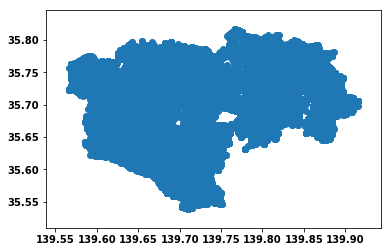

In [209]:
plt.scatter(total_data["経度"], total_data["緯度"])
xmin, xmax, ymin, ymax = plt.axis()
plt.show()

## plot chika coordinates

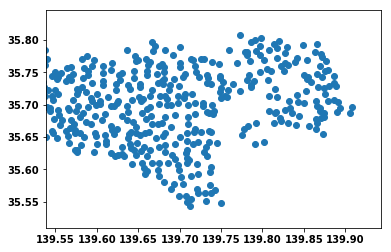

In [210]:
plt.scatter(chika["経度"], chika["緯度"])
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

In [211]:
total_data_coordinates = total_data[["経度", "緯度"]]
total_data_coordinates.head()

,経度,緯度
0,139.728800,35.748456
1,139.778627,35.662885
2,139.666255,35.675153
3,139.648465,35.700170
4,139.872321,35.766431


In [212]:
chika_coordinates = chika[["経度", "緯度"]]
chika_coordinates.head()

,経度,緯度
2,139.100249,35.805283
4,139.127196,35.817150
5,139.127698,35.743971
7,139.137413,34.204022
8,139.139554,34.209796


In [213]:
from scipy.spatial.distance import cdist

In [214]:
dist = cdist(total_data_coordinates, chika_coordinates)

In [215]:
dist.shape

(62732, 769)

In [216]:
arg_min_dist_5 = []
for i in range(5):
    arg_min_dist_5.append(np.argsort(dist)[:, i])

In [217]:
arg_min_dist_5

[array([626, 662, 525, ..., 523, 630, 579]),
 array([615, 667, 509, ..., 530, 627, 580]),
 array([609, 661, 521, ..., 542, 641, 600]),
 array([629, 676, 532, ..., 540, 642, 565]),
 array([608, 675, 541, ..., 497, 639, 574])]

In [218]:
for i in range(5):
    print(chika.iloc[arg_min_dist_5[i]][['Ｈ３０価格']].head())

        Ｈ３０価格
922    470000
1053  1240000
704    590000
664    605000
1238   360000
       Ｈ３０価格
893   500000
1071  873000
677   452000
635   540000
1229  363000
        Ｈ３０価格
881    480000
1046  1010000
695    500000
671    525000
1224   314000
        Ｈ３０価格
927    485000
1099   543000
719   1090000
656    478000
1227   260000
        Ｈ３０価格
876    480000
1097   600000
732   1020000
620    560000
1237   323000


In [219]:
chika_h30 = pd.DataFrame()
for i in range(5):
    chika_h30 = pd.concat([chika_h30, chika.iloc[arg_min_dist_5[i]][['Ｈ３０価格']].reset_index(drop=True)], axis=1)

In [220]:
chika_h30.mean(axis=1).head()

0    483000.0
1    853200.0
2    730400.0
3    541600.0
4    324000.0
dtype: float64

In [221]:
total_data = pd.concat([total_data, chika_h30.mean(axis=1)], axis=1).rename(columns={0: "地価5年平均"})

In [222]:
target.head(10)

0     75000
1     76000
2    110000
3    150000
4     74000
5    160000
6     78500
7    115000
8    184327
9     76000
Name: 賃料, dtype: int64

In [223]:
total_data.columns.values

array(['所在地', 'アクセス', '間取り', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信',
       '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '築年数_月', '階建', '所在階_地下',
       '階建_地下', '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R', '間取り_S',
       '間取り_数', '方角_南', '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月',
       '所在地_区', 'アクセス_線_1', 'アクセス_駅_1', 'アクセス_駅_1_徒歩_分', 'アクセス_駅_1_車_分',
       'アクセス_駅_1_バス_分', 'アクセス_駅_1_バス停', 'アクセス_駅_1_バス停_徒歩', 'アクセス_線_2',
       'アクセス_駅_2', 'アクセス_駅_2_徒歩_分', 'アクセス_駅_2_車_分', 'アクセス_駅_2_バス_分',
       'アクセス_駅_2_バス停', 'アクセス_駅_2_バス停_徒歩', 'シャワー', 'トイレなし', 'バスなし',
       'バス・トイレ別', '共同トイレ', '共同バス', '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機',
       '温水洗浄便座', '脱衣所', '追焚機能', 'IHコンロ', 'L字キッチン', 'カウンターキッチン', 'ガスコンロ',
       'コンロ1口', 'コンロ2口', 'コンロ3口', 'コンロ4口以上', 'コンロ設置可(コンロ1口)',
       'コンロ設置可(コンロ2口)', 'コンロ設置可(コンロ3口)', 'コンロ設置可(コンロ4口以上)',
       'コンロ設置可(口数不明)', 'システムキッチン', '冷蔵庫あり', '独立キッチン', '給湯', '電気コンロ',
       'BSアンテナ', 'CATV', 'CSアンテナ', 'インターネット使用料無料', 'インターネット対応', '光ファイバー',
       '有線放送', '高速インターネット', 

# Drop columns

In [224]:
for i in total_data.columns.values:
    print(i)

所在地
アクセス
間取り
方角
面積
所在階
バス・トイレ
キッチン
放送・通信
室内設備
駐車場
周辺環境
建物構造
契約期間
築年数_月
階建
所在階_地下
階建_地下
納戸
間取り_D
間取り_K
間取り_L
間取り_R
間取り_S
間取り_数
方角_南
方角_東
方角_西
方角_北
契約期間_定期借家
契約期間_月
所在地_区
アクセス_線_1
アクセス_駅_1
アクセス_駅_1_徒歩_分
アクセス_駅_1_車_分
アクセス_駅_1_バス_分
アクセス_駅_1_バス停
アクセス_駅_1_バス停_徒歩
アクセス_線_2
アクセス_駅_2
アクセス_駅_2_徒歩_分
アクセス_駅_2_車_分
アクセス_駅_2_バス_分
アクセス_駅_2_バス停
アクセス_駅_2_バス停_徒歩
シャワー
トイレなし
バスなし
バス・トイレ別
共同トイレ
共同バス
専用トイレ
専用バス
洗面台独立
浴室乾燥機
温水洗浄便座
脱衣所
追焚機能
IHコンロ
L字キッチン
カウンターキッチン
ガスコンロ
コンロ1口
コンロ2口
コンロ3口
コンロ4口以上
コンロ設置可(コンロ1口)
コンロ設置可(コンロ2口)
コンロ設置可(コンロ3口)
コンロ設置可(コンロ4口以上)
コンロ設置可(口数不明)
システムキッチン
冷蔵庫あり
独立キッチン
給湯
電気コンロ
BSアンテナ
CATV
CSアンテナ
インターネット使用料無料
インターネット対応
光ファイバー
有線放送
高速インターネット
24時間換気システム
2面採光
3面採光
ウォークインクローゼット
エアコン付
エレベーター
オール電化
ガスその他
ガス暖房
クッションフロア
シューズボックス
タイル張り
トランクルーム
バリアフリー
バルコニー
フローリング
プロパンガス
ペアガラス
ルーフバルコニー
ロフト付き
下水
二世帯住宅
二重サッシ
井戸
公営水道
冷房
出窓
地下室
室内洗濯機置場
室外洗濯機置場
専用庭
床下収納
床暖房
排水その他
敷地内ごみ置き場
水道その他
汲み取り
洗濯機置場なし
浄化槽
石油暖房
都市ガス
防音室
駐輪場
バイク置き場
駐車場_1
空有
無
近隣
空無
駐車場_台数
駐車場_料金
【スーパー】
【コンビニ】
【飲食店】
【ドラッグストア】
【病院】
【公園】
【郵便局】
【小学校】
【大学】
【総合

In [225]:
columns = ["所在地", "アクセス", "間取り", "方角", "バス・トイレ", "キッチン",
           "放送・通信", "室内設備", "駐車場", "周辺環境", "契約期間"]

In [226]:
total_data = total_data.drop(columns=columns)

In [227]:
total_data = total_data.replace(r'^\s*$', np.nan, regex=True)

In [228]:
total_data.select_dtypes("object")

,建物構造,所在地_区,アクセス_線_1,アクセス_駅_1,アクセス_駅_1_バス停,アクセス_線_2,アクセス_駅_2,アクセス_駅_2_バス停
0,RC(鉄筋コンクリート),北,都営三田線,西巣鴨駅,None,埼京線,板橋駅,None
1,鉄骨造,中央,都営大江戸線,勝どき駅,None,有楽町線,月島駅,None
2,RC(鉄筋コンクリート),渋谷,京王線,笹塚駅,None,京王線,代田橋駅,None
3,RC(鉄筋コンクリート),杉並,総武中央各停線,高円寺駅,None,丸ノ内池袋荻窪線,新高円寺駅,None
4,木造,葛飾,京成金町線,京成金町駅,None,常磐線,金町駅,None
5,RC(鉄筋コンクリート),荒川,常磐快速線,南千住駅,None,都電荒川線,三ノ輪橋駅,None
6,RC(鉄筋コンクリート),練馬,西武池袋線,大泉学園駅,None,西武池袋線,保谷駅,None
7,RC(鉄筋コンクリート),目黒,東急東横線,学芸大学駅,None,東急東横線,都立大学駅,None
8,SRC(鉄骨鉄筋コンクリート),文京,南北線,東大前駅,None,都営三田線,白山駅,None
9,鉄骨造,板橋,埼京線,板橋駅,None,都営三田線,新板橋駅,None


In [229]:
total_data["シャワー"].unique()

array([ True, False])

In [230]:
missing_values = missing_values_table(total_data)
missing_values

Your selected dataframe has 147 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
アクセス_駅_1_車_分,62729,100.0
アクセス_駅_2_車_分,62693,99.9
所在階_地下,62624,99.8
アクセス_駅_1_バス停_徒歩,62255,99.2
アクセス_駅_1_バス_分,62245,99.2
アクセス_駅_1_バス停,62245,99.2
アクセス_駅_2_バス停_徒歩,61812,98.5
アクセス_駅_2_バス_分,61806,98.5
アクセス_駅_2_バス停,61806,98.5
駐車場_台数,61233,97.6


In [231]:
columns_to_drop = missing_values[missing_values["% of Total Values"] > 70].index.values

In [232]:
total_data = total_data.drop(columns=columns_to_drop)

In [233]:
total_data.shape

(62732, 134)

In [234]:
missing_values = missing_values_table(total_data)
missing_values

Your selected dataframe has 134 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
アクセス_駅_2_徒歩_分,3950,6.3
アクセス_駅_2,2985,4.8
アクセス_線_2,2984,4.8
アクセス_駅_1_徒歩_分,488,0.8


# Dump the data

In [235]:
total_data["id"] = total_id
X_train = total_data.iloc[:train.shape[0]].copy()
X_test = total_data.iloc[train.shape[0]:].copy()
X_train["賃料"] = target.values

In [236]:
X_train.to_csv("./preprocessed_data/preprocessed_train.csv", index=None)
X_test.to_csv("./preprocessed_data/preprocessed_test.csv", index=None)